In [1]:
!pip install optuna

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [4]:
df = pd.read_csv(r'../data/raw/online_news_modified.csv')

# Parte 1 Analisis EDA

In [5]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,mixed_type_col
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594466988,0.999999992308,0.815384609112,4.0,2.0,1.0,...,0.7,-0.35,-0.6,-3.4000000000000004,0.5,-0.1875,0.0,0.1875,593.0,bad
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743080614,0.999999993289,0.79194630341,3.0,1.0,1.0,...,0.7,-0.11875,-0.125,-0.1,0.0,0.0,0.5,0.0,711.0,639
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575129530699,0.999999991597,0.66386554064,3.0,1.0,1.0,...,1.0,-0.466666666667,-0.8,-0.133333333333,0.0,0.0,0.5,0.0,1500.0,unknown
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503787877834,0.999999996904,0.665634672862,9.0,0.0,1.0,...,0.8,-0.369696969697,-0.6,-0.166666666667,0.0,0.0,0.5,NaN,1200.0,688
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.41564561695,0.999999998565,0.540889525766,19.0,19.0,20.0,...,1.0,-0.220192307692,error,-0.05,0.454545454545,0.136363636364,0.0454545454545,0.136363636364,505.0,579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40431,http://mashable.com/2014/11/17/fearful-pit-bull/,51.0,10.0,357.0,0.625730992322,0.999999995215,0.827751192212,9.0,0.0,1.0,...,0.6,-0.333333333333,-1.0,-0.0833333333333,0.0,0.0,0.5,0.0,3000.0,335
40432,HTTP://MASHABLE.COM/2014/07/25/LYFTS-NYC-LAUN...,167.0,8.0,792.0,0.494208493572,0.999999998047,0.63476562376,18.0,10.0,2.0,...,0.5,-0.210416666667,-0.8,-0.1,0.0,0.0,0.5,0.0,1500.0,462
40433,http://mashable.com/2014/05/08/furry-friends-s...,245.0,9.0,737.0,0.376955902735,0.999999997712,0.489702516042,20.0,3.0,22.0,...,1.0,-0.159449404762,-0.2,-0.0714285714286,0.0,0.0,0.5,0.0,2900.0,149
40434,http://mashable.com/2013/06/06/prism-tech-comp...,581.0,10.0,408.0,0.54679802821,0.999999996139,0.687258684605,12.0,6.0,1.0,...,0.5,NaN,-0.4,-0.1,0.0,0.0,25.5,0.0,4500.0,NaN


In [6]:
df.shape

(40436, 62)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40436 entries, 0 to 40435
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   url                            40027 non-null  object
 1   timedelta                      39994 non-null  object
 2   n_tokens_title                 39976 non-null  object
 3   n_tokens_content               39963 non-null  object
 4   n_unique_tokens                39985 non-null  object
 5   n_non_stop_words               39977 non-null  object
 6   n_non_stop_unique_tokens       39956 non-null  object
 7   num_hrefs                      39986 non-null  object
 8   num_self_hrefs                 39988 non-null  object
 9   num_imgs                       39980 non-null  object
 10  num_videos                     39987 non-null  object
 11  average_token_length           40031 non-null  object
 12  num_keywords                   39981 non-null  object
 13  d

Las variables se encuentran como tipo object, a pesar de que muchas tienen numeros. El formato de variables esta mal

In [8]:
pd.set_option('display.max_rows', None)   # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

In [9]:
df.describe(include = 'all').T

,count,unique,top,freq
url,40027,39313,NAN,17
timedelta,39994,1677,84.0,100
n_tokens_title,39976,363,10.0,6984
n_tokens_content,39963,3509,0.0,1131
n_unique_tokens,39985,28030,0.0,1131
n_non_stop_words,39977,2542,0.0,1116
n_non_stop_unique_tokens,39956,24007,0.0,1112
num_hrefs,39986,526,5.0,3282
num_self_hrefs,39988,379,2.0,7210
num_imgs,39980,390,1.0,17112


In [10]:
#Valores únicos
df.nunique()

url                              39313
timedelta                         1677
n_tokens_title                     363
n_tokens_content                  3509
n_unique_tokens                  28030
n_non_stop_words                  2542
n_non_stop_unique_tokens         24007
num_hrefs                          526
num_self_hrefs                     379
num_imgs                           390
num_videos                         293
average_token_length             30635
num_keywords                       338
data_channel_is_lifestyle          209
data_channel_is_entertainment      211
data_channel_is_bus                217
data_channel_is_socmed             204
data_channel_is_tech               228
data_channel_is_world              220
kw_min_min                         336
kw_max_min                        2043
kw_avg_min                       18434
kw_min_max                        1626
kw_max_max                         354
kw_avg_max                       31340
kw_min_avg               

In [11]:
#Guardamos cantidad de observaciones y número de columnas
data_observaciones = df.shape[0]
data_columnas = df.shape[1]

print("Número de observaciones", data_observaciones)
print("Número de columnas:", data_columnas)

Número de observaciones 40436
Número de columnas: 62


In [12]:
#Porcentaje de valores faltantes por columna.
missing_values_count = df.isna().sum()
print(round(missing_values_count*100/data_observaciones,2))
print("Total de registros:",df.shape[0])

url                               1.01
timedelta                         1.09
n_tokens_title                    1.14
n_tokens_content                  1.17
n_unique_tokens                   1.12
n_non_stop_words                  1.14
n_non_stop_unique_tokens          1.19
num_hrefs                         1.11
num_self_hrefs                    1.11
num_imgs                          1.13
num_videos                        1.11
average_token_length              1.00
num_keywords                      1.13
data_channel_is_lifestyle         1.17
data_channel_is_entertainment     1.20
data_channel_is_bus               1.01
data_channel_is_socmed            1.22
data_channel_is_tech              1.10
data_channel_is_world             1.12
kw_min_min                        1.12
kw_max_min                        1.15
kw_avg_min                        1.16
kw_min_max                        1.09
kw_max_max                        1.00
kw_avg_max                        1.18
kw_min_avg               

In [13]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [14]:
#Función para generar histograma
def hist_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    plt.show()

In [19]:
df_numeric = pd.DataFrame()
exclude = ['url']
non_numeric_cols = []

for col in df.columns:
  if col in exclude:
        continue
  try:
        df_numeric[col] = pd.to_numeric(df[col], errors='coerce')
  except (ValueError, TypeError):
        non_numeric_cols.append(col)

df_numeric.insert(0, 'url', df['url'].astype('object'))
print("Columns that could not be converted to numeric:")
print(non_numeric_cols)
display(df_numeric.head())

Columns that could not be converted to numeric:
[]


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,mixed_type_col
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-3.400000,0.500000,-0.187500,0.000000,0.187500,593.0,NaN
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0,639.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0,NaN
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,NaN,1200.0,688.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,NaN,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0,579.0


In [16]:
df_numeric.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,40027,39313,NAN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_tokens_title,39822.0,NaN,NaN,NaN,16.154437,63.28542,2.0,9.0,10.0,12.0,1679.0
n_tokens_content,39805.0,NaN,NaN,NaN,688.481171,3076.999568,0.0,247.0,413.0,725.0,320522.0
n_unique_tokens,39834.0,NaN,NaN,NaN,3.487791,44.572238,0.0,0.471574,0.540368,0.610918,2677.586775
n_non_stop_words,39855.0,NaN,NaN,NaN,4.777544,154.956183,0.0,1.0,1.0,1.0,29682.0
...,...,...,...,...,...,...,...,...,...,...,...
title_sentiment_polarity,39809.0,NaN,NaN,NaN,2.58259,40.442477,-59.4,0.0,0.0,0.15625,998.5
abs_title_subjectivity,39808.0,NaN,NaN,NaN,4.847005,252.621555,0.0,0.166667,0.5,0.5,42202.5
abs_title_sentiment_polarity,39824.0,NaN,NaN,NaN,3.712572,133.349475,0.0,0.0,0.0,0.25,20574.0
shares,39805.0,NaN,NaN,NaN,4374.463158,35263.988332,1.0,950.0,1400.0,2800.0,5185800.0


In [17]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40436 entries, 0 to 40435
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            40027 non-null  object 
 1   n_tokens_title                 39822 non-null  float64
 2   n_tokens_content               39805 non-null  float64
 3   n_unique_tokens                39834 non-null  float64
 4   n_non_stop_words               39855 non-null  float64
 5   n_non_stop_unique_tokens       39799 non-null  float64
 6   num_hrefs                      39839 non-null  float64
 7   num_self_hrefs                 39828 non-null  float64
 8   num_imgs                       39840 non-null  float64
 9   num_videos                     39849 non-null  float64
 10  average_token_length           39902 non-null  float64
 11  num_keywords                   39831 non-null  float64
 12  data_channel_is_lifestyle      39823 non-null 

In [20]:
#Borrar los nans del label
df_numeric.dropna(subset=['shares'], inplace=True)

#Borrar la columna URL porque es el identificador del articulo y no aporta a la logica del problema
df_numeric.drop(columns=['url'], inplace=True)

#Borrar la columna timedelta porque no aporta a la logica del problema
df_numeric.drop(columns=['timedelta'], inplace=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
missing_values_percentage = (df_numeric.isnull().sum() / len(df_numeric)) * 100
print("Percentage of missing values per column:")
print(missing_values_percentage)

Percentage of missing values per column:
n_tokens_title                    1.512373
n_tokens_content                  1.560106
n_unique_tokens                   1.482226
n_non_stop_words                  1.439518
n_non_stop_unique_tokens          1.577691
num_hrefs                         1.474689
num_self_hrefs                    1.494787
num_imgs                          1.479714
num_videos                        1.439518
average_token_length              1.318930
num_keywords                      1.489763
data_channel_is_lifestyle         1.524934
data_channel_is_entertainment     1.502324
data_channel_is_bus               1.354101
data_channel_is_socmed            1.582716
data_channel_is_tech              1.437005
data_channel_is_world             1.457103
kw_min_min                        1.499812
kw_max_min                        1.524934
kw_avg_min                        1.507348
kw_min_max                        1.479714
kw_max_max                        1.399322
kw_avg_max   

In [21]:
# Se hace una lista de variables numéricas y otra de categóricas
num_cols = df_numeric.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_numeric.select_dtypes(exclude=np.number).columns.tolist()

print("Columnas numéricas:",num_cols)
print("Columnas categóricas:",cat_cols)

Columnas numéricas: ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', '

Imputamos las variables con la mediana 

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

In [ ]:
missing_values_percentage = (df_numeric.isnull().sum() / len(df_numeric)) * 100
print("Porcentaje de valores faltantes por variable:")
print(missing_values_percentage)

Percentage of missing values per column:
n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
kw_avg_avg                       0

In [ ]:
df_numeric['shares'].describe().T

count    3.980500e+04
mean     4.374463e+03
std      3.526399e+04
min      1.000000e+00
25%      9.500000e+02
50%      1.400000e+03
75%      2.800000e+03
max      5.185800e+06
Name: shares, dtype: float64

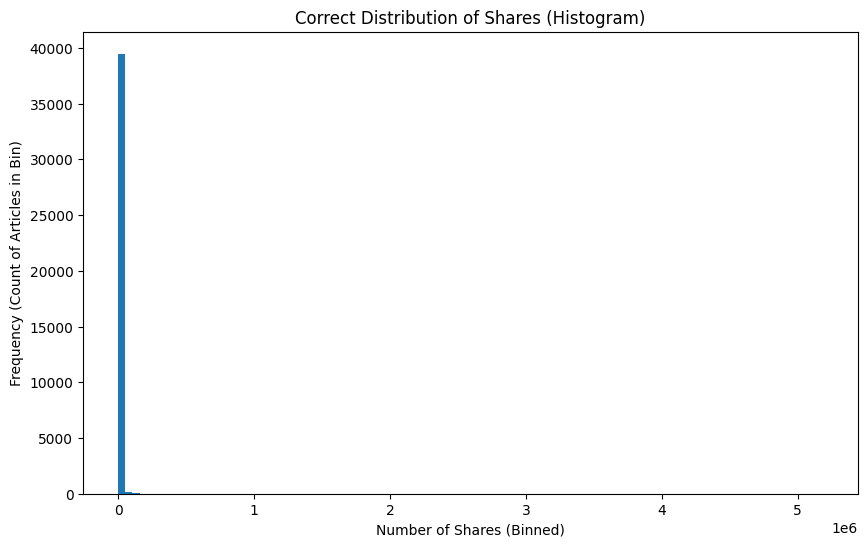

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# A histogram is the correct way to see frequency distribution
plt.hist(df_numeric['shares'], bins=100) # Using more bins helps see the detail

plt.title('Correct Distribution of Shares (Histogram)')
plt.xlabel('Number of Shares (Binned)')
plt.ylabel('Frequency (Count of Articles in Bin)')
plt.show()

Muy pocos post se hacen virales

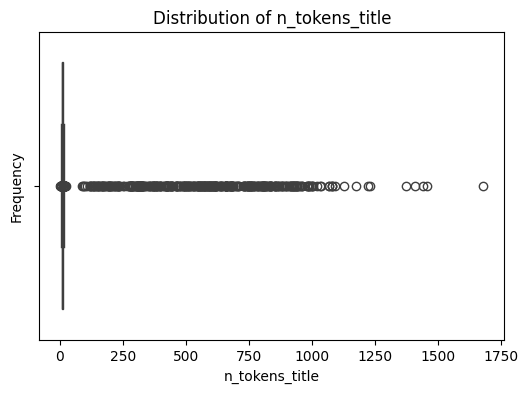

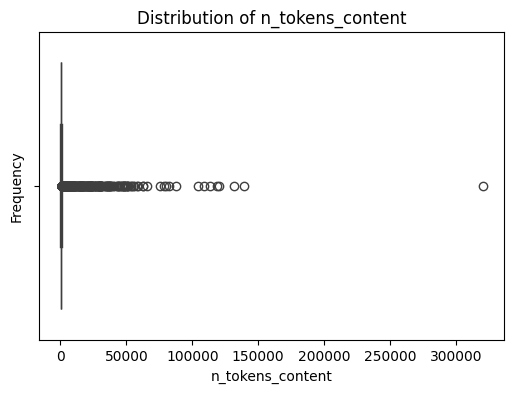

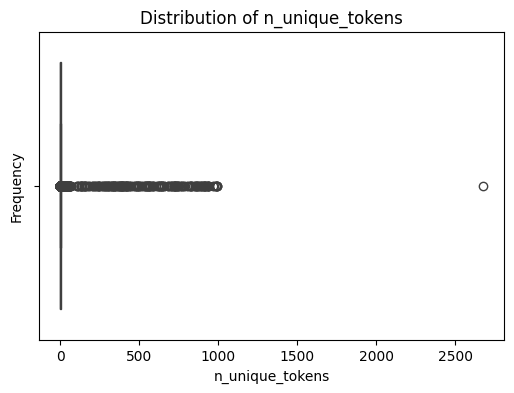

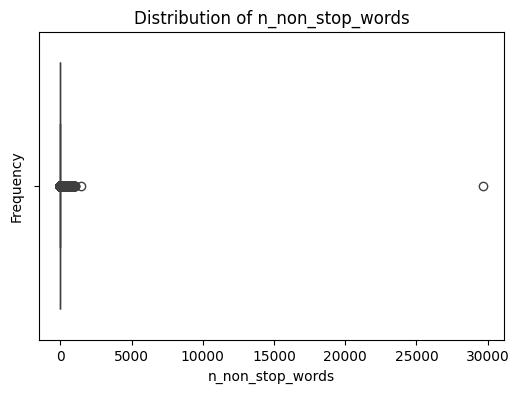

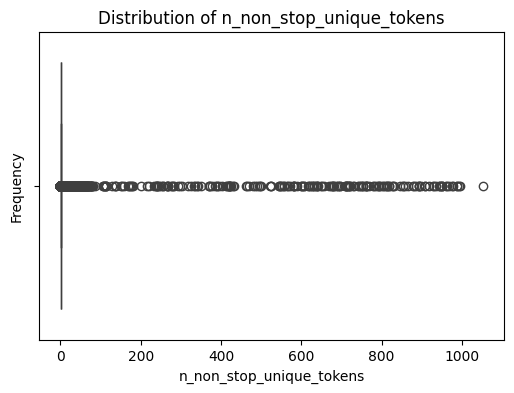

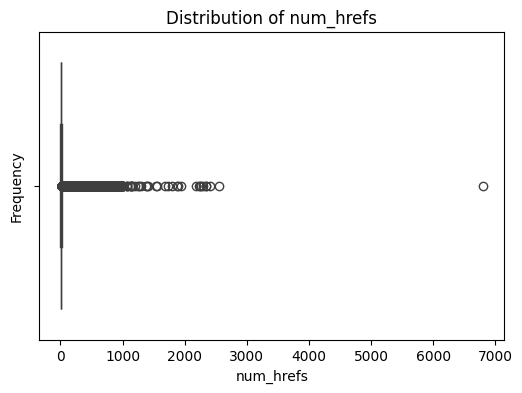

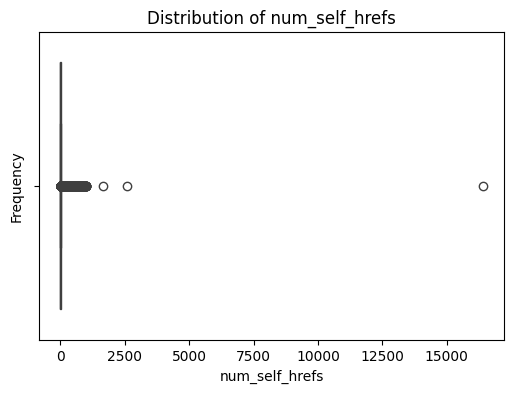

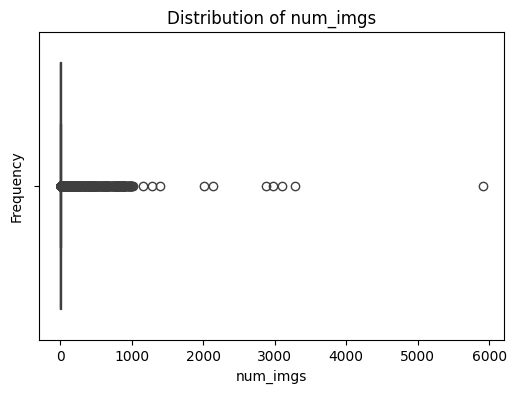

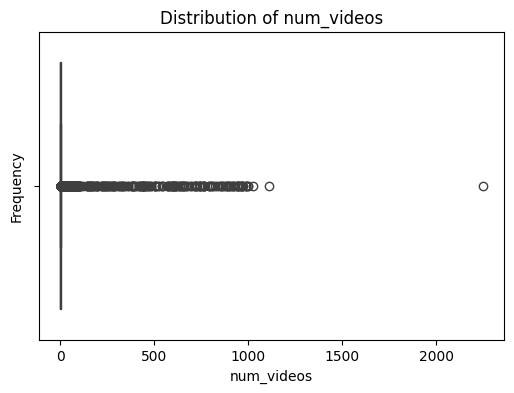

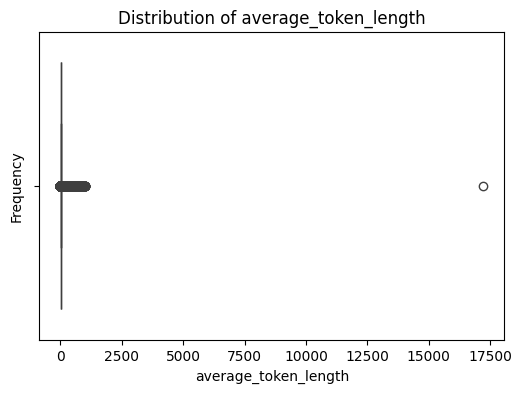

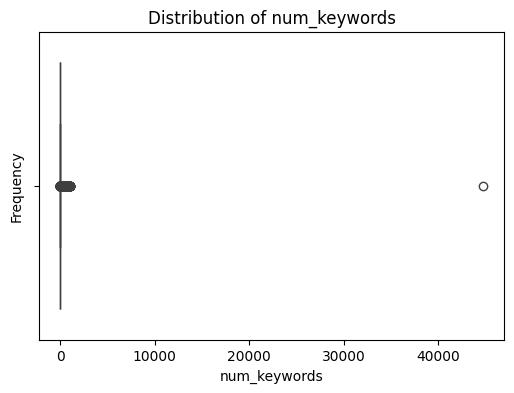

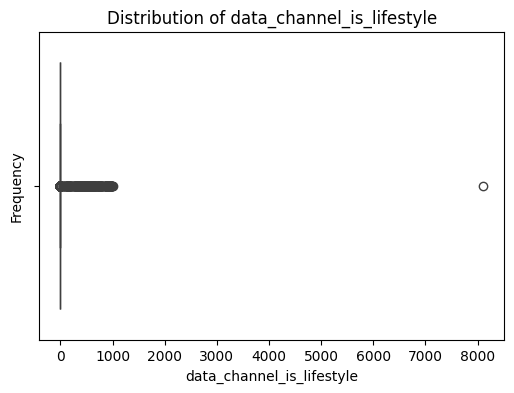

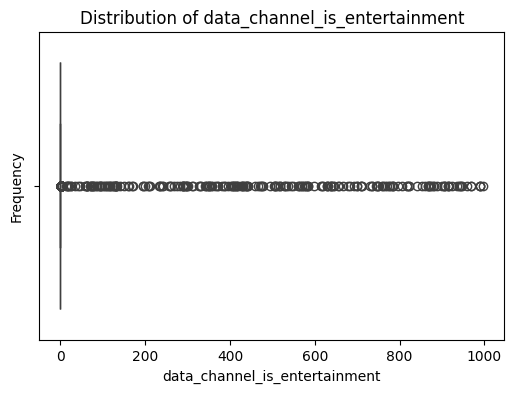

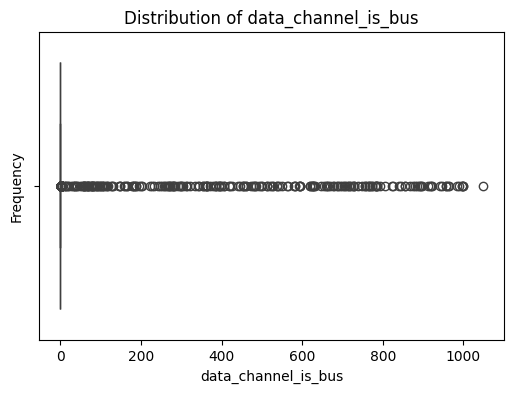

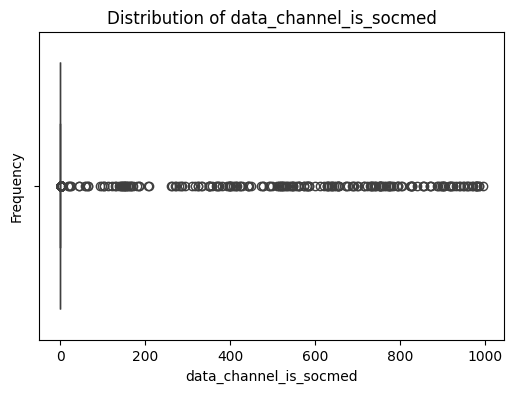

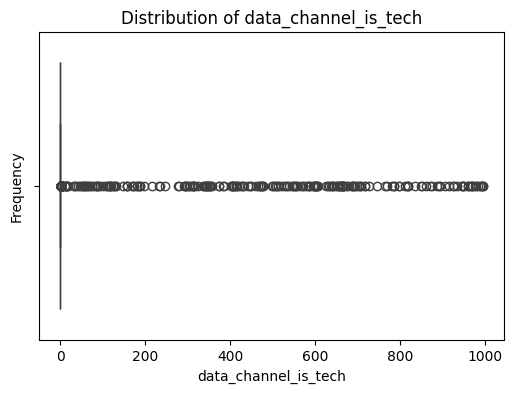

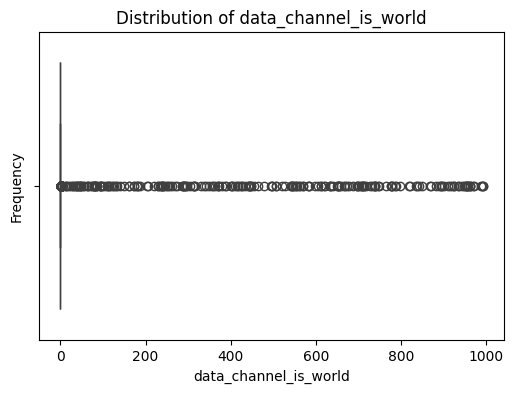

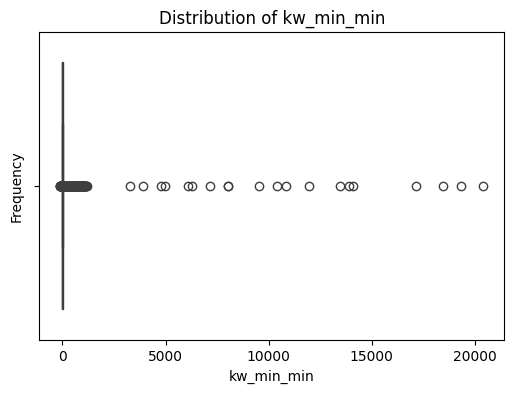

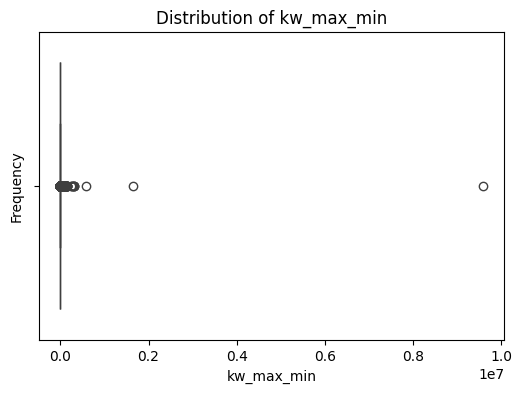

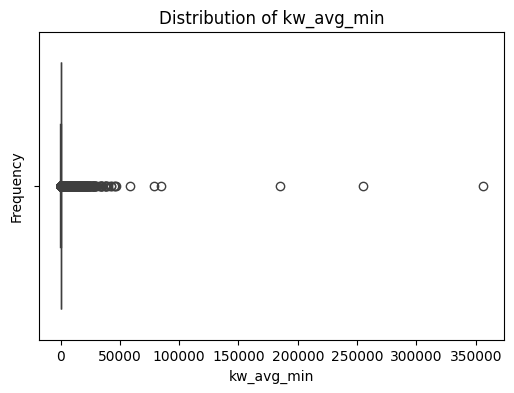

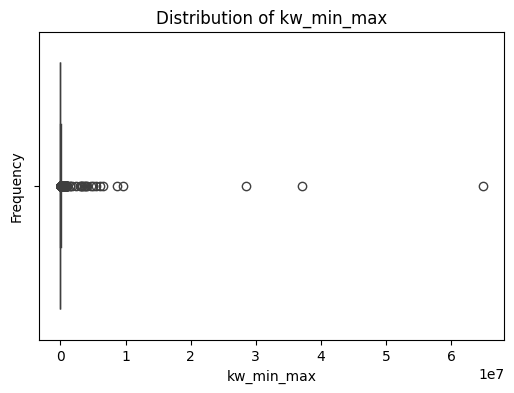

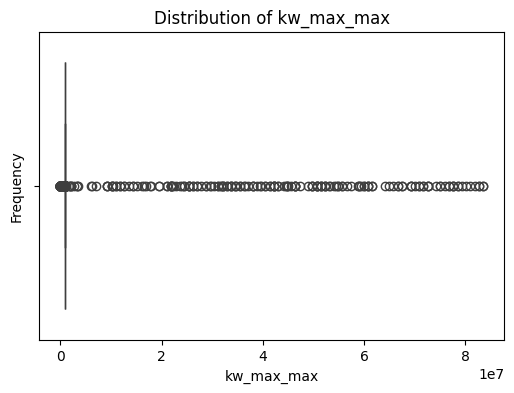

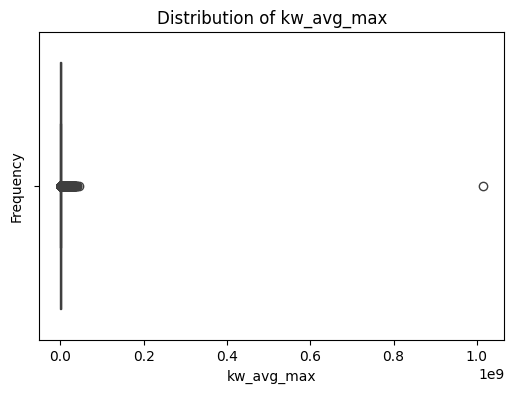

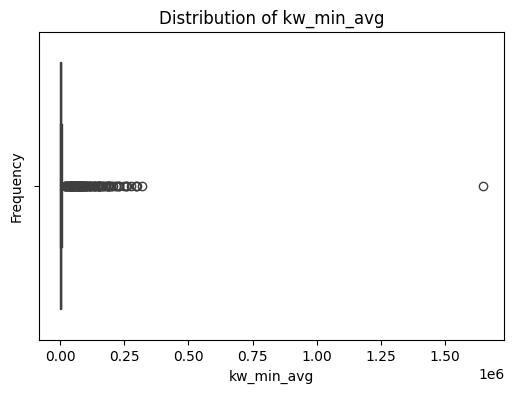

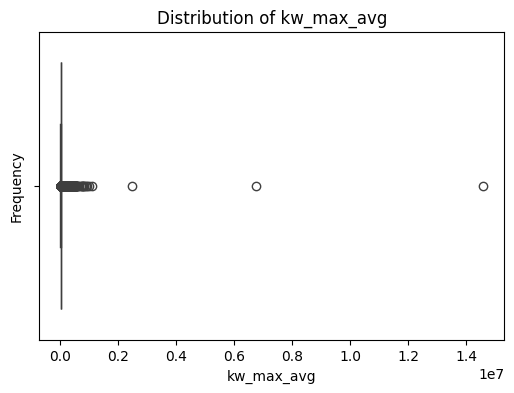

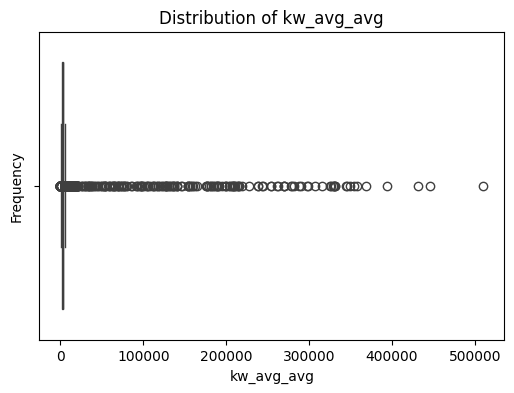

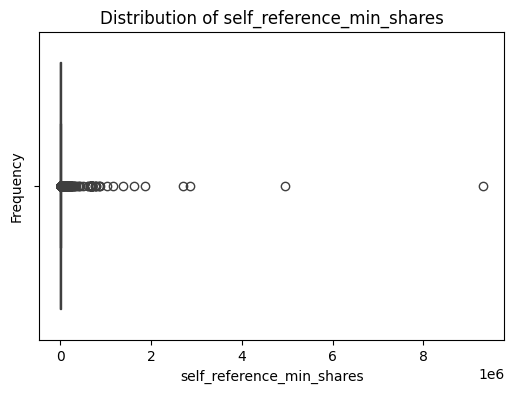

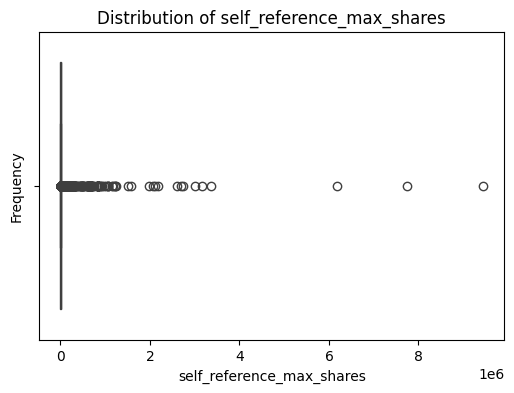

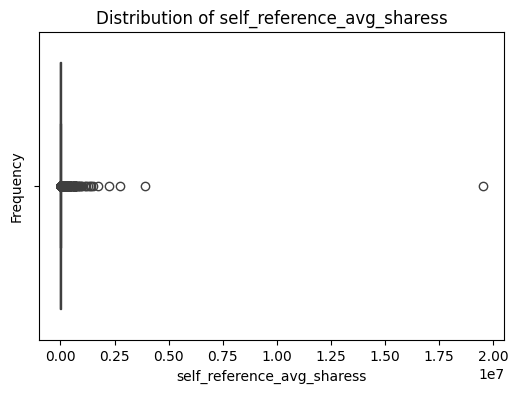

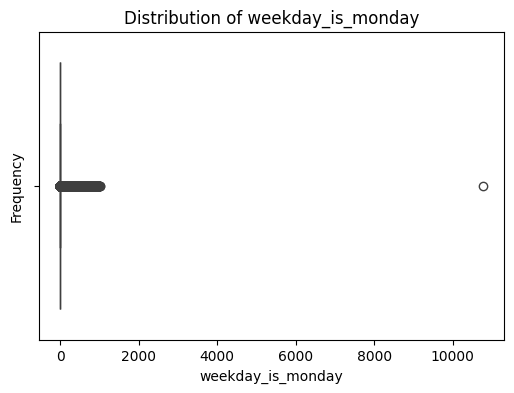

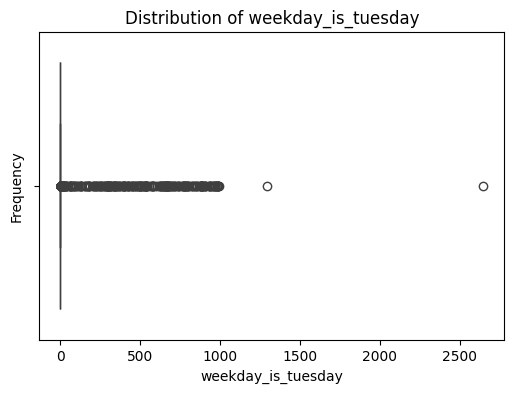

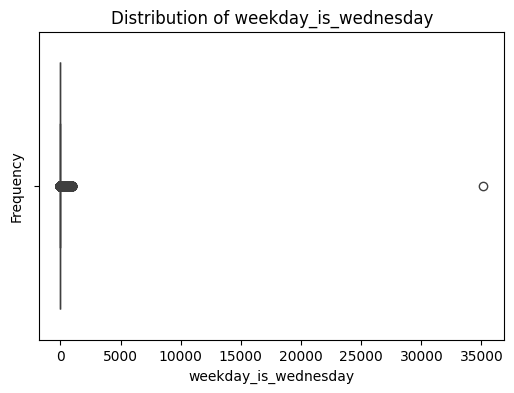

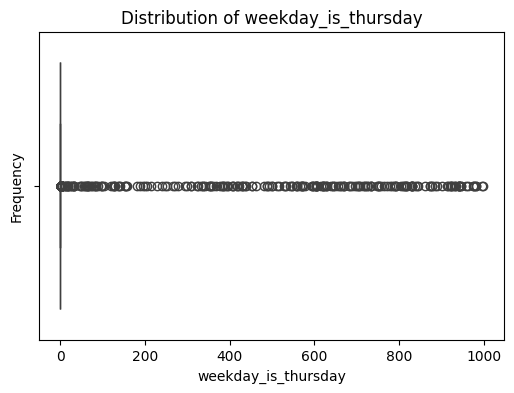

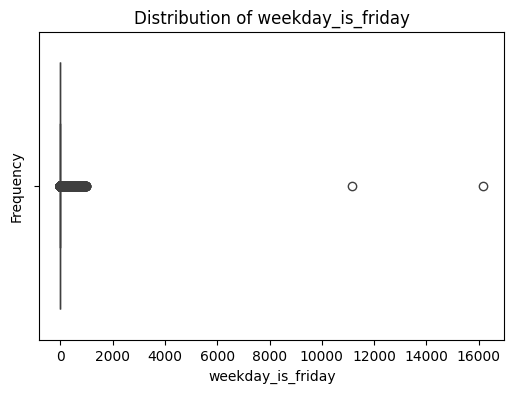

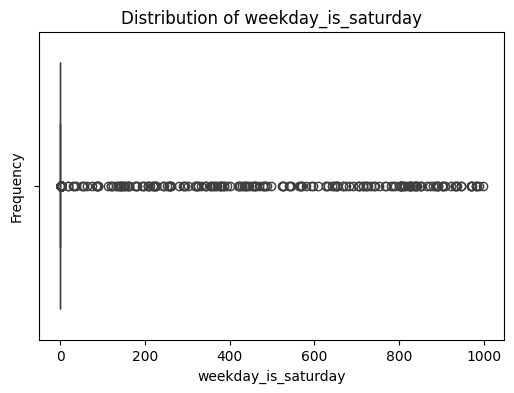

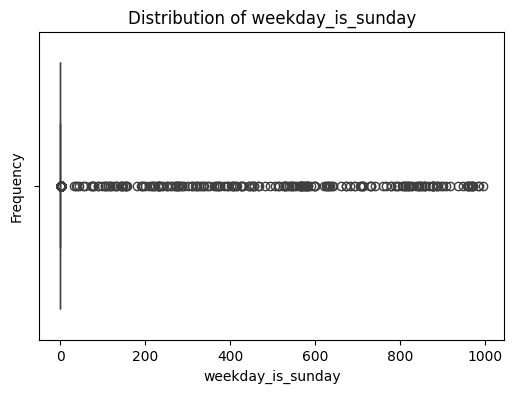

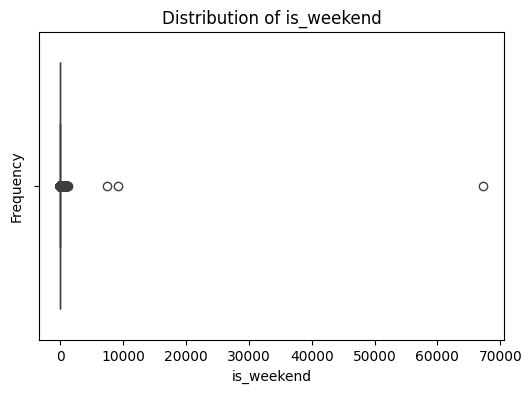

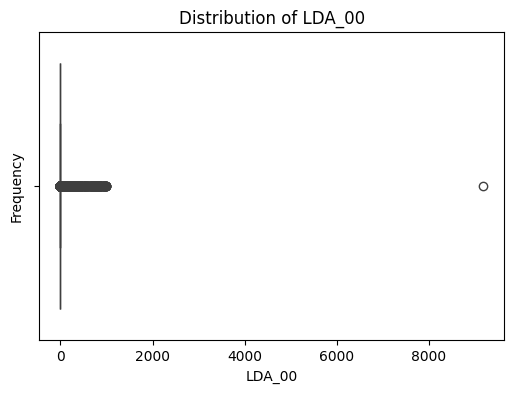

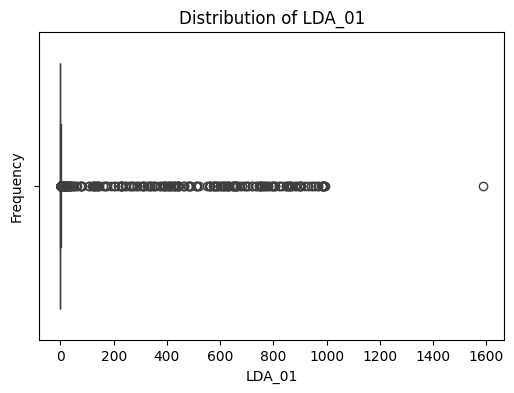

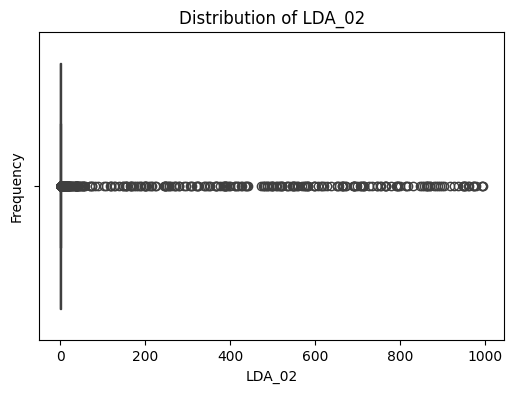

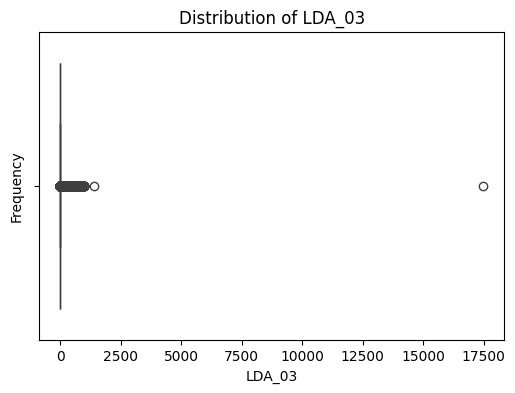

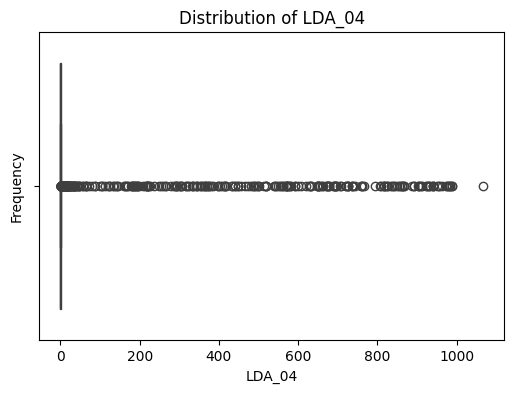

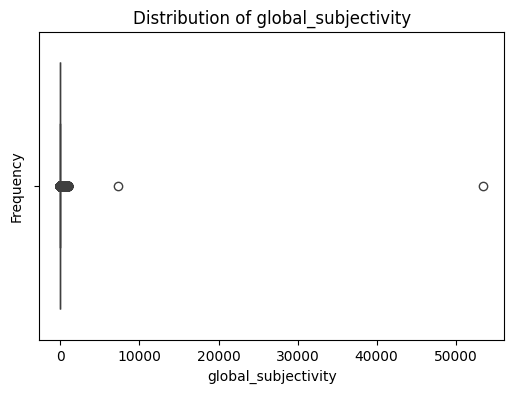

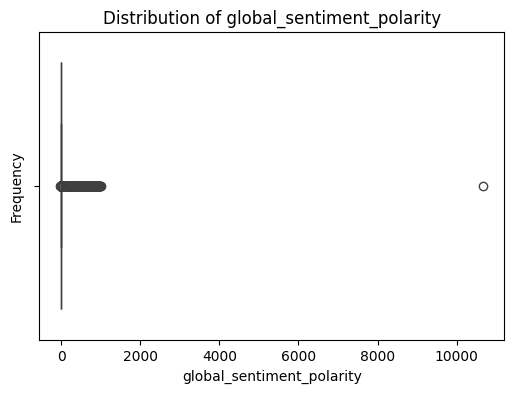

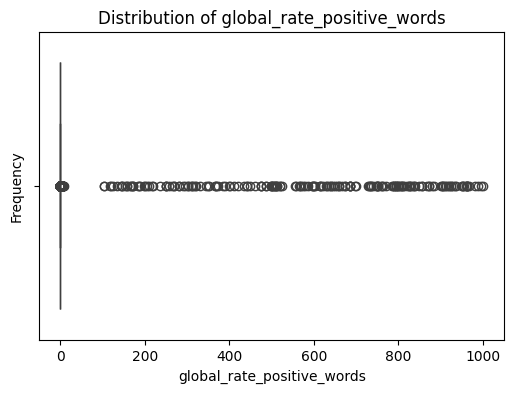

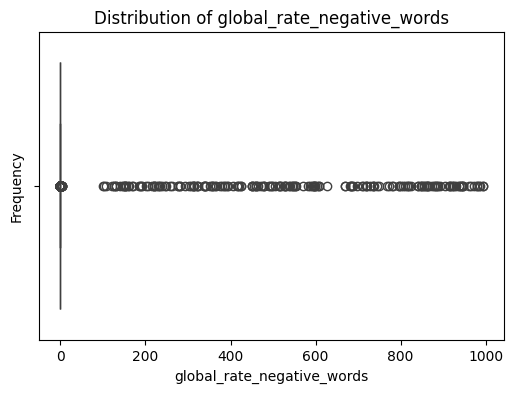

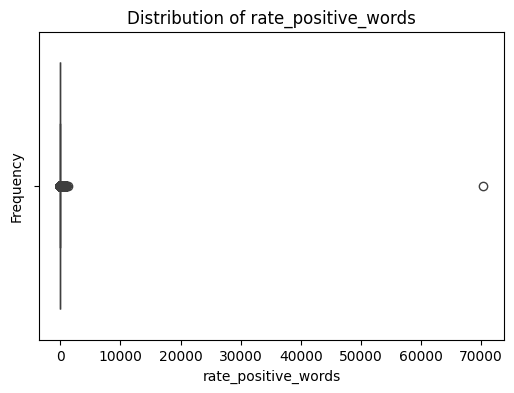

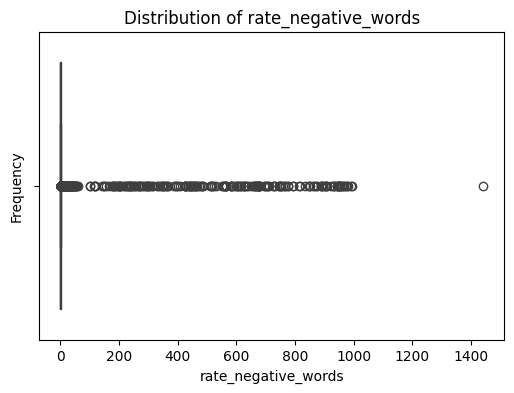

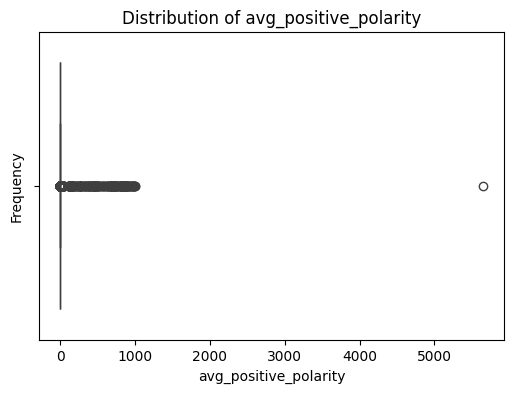

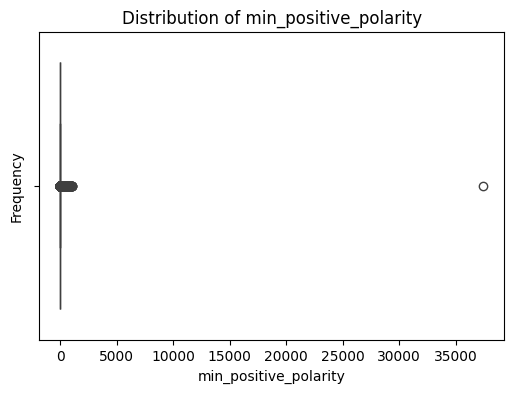

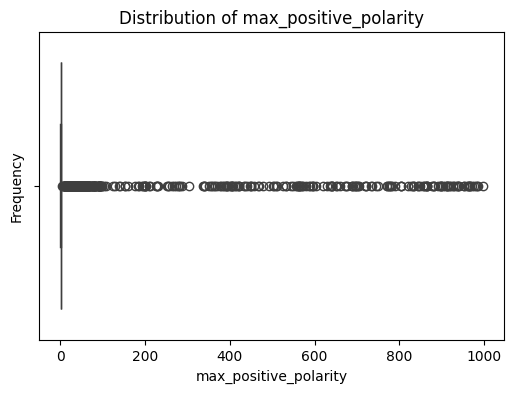

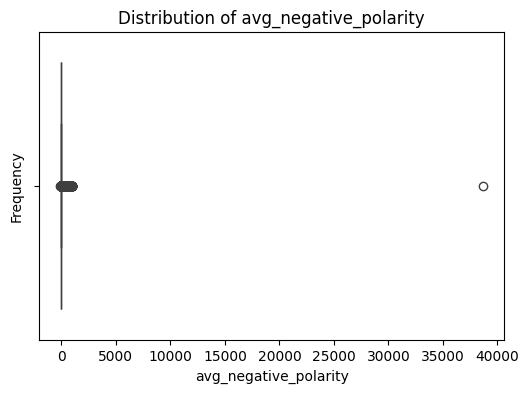

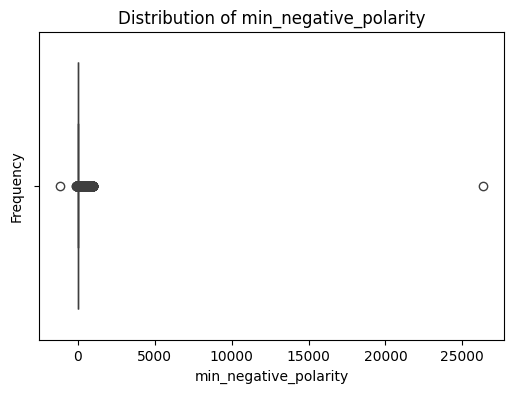

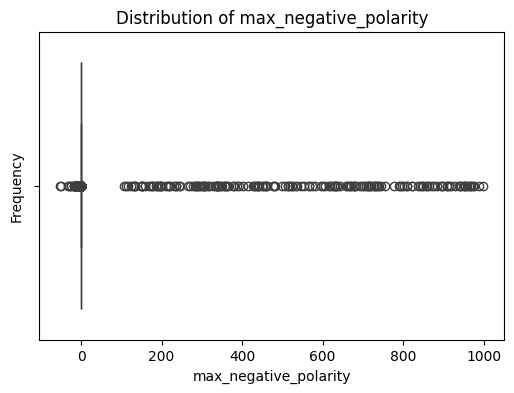

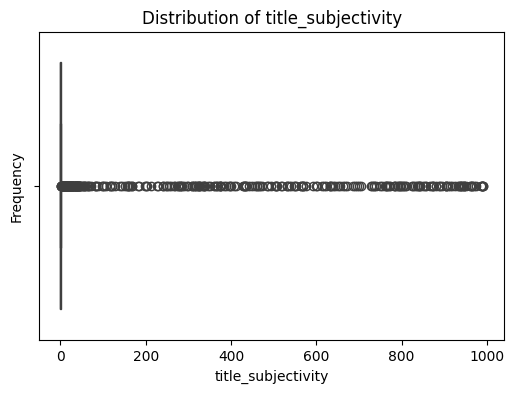

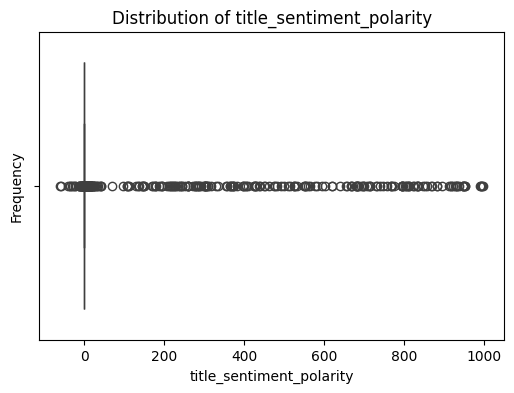

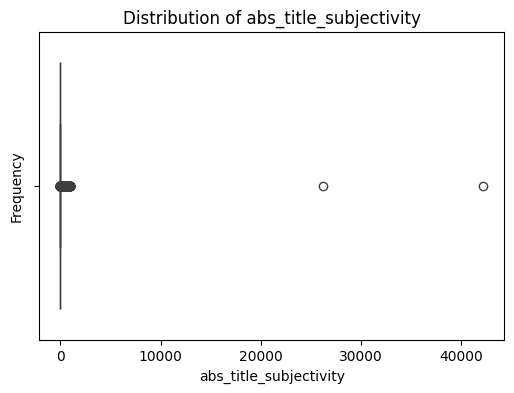

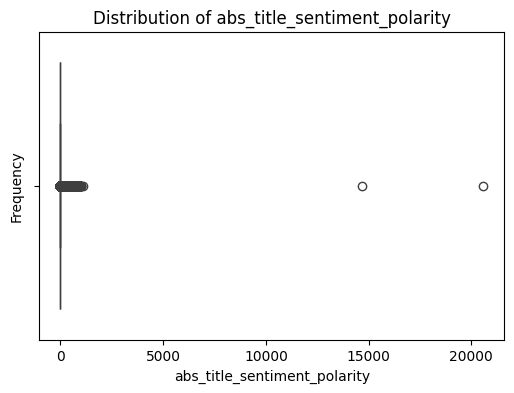

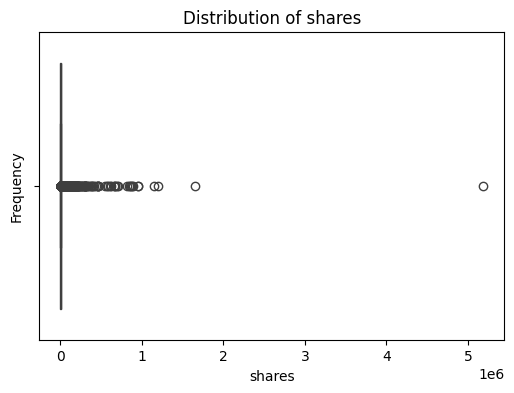

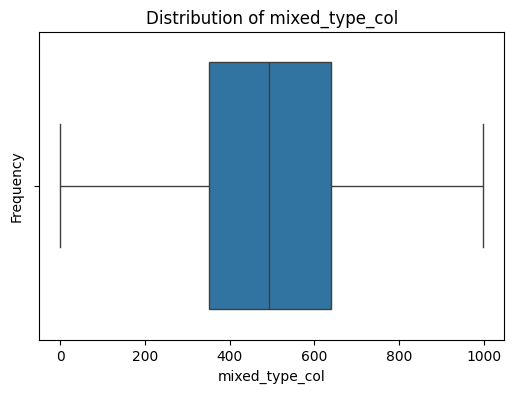

In [ ]:
for col in df_numeric.columns:
    plt.figure(figsize=(6, 4)) # Reduced figure size
    # sns.histplot(df_numeric[col], kde=True, bins=50) # Added fixed number of bins
    sns.boxplot(x=df_numeric[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    plt.close() # Close the figure to free memory

In [24]:
corr1 = df_numeric.corr(numeric_only=True)
corr1

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,mixed_type_col
n_tokens_title,1.000000,-0.003779,0.001214,-0.001071,-0.003313,-0.001355,6.528841e-03,0.000321,0.013986,-0.001484,-0.001623,-0.001631,-0.002429,-0.004285,0.006743,0.006605,0.002899,-0.001488,-0.001304,-0.003550,-0.000798,0.001326,-0.000066,-0.001794,0.000360,-0.005183,-0.001936,-0.002222,-1.414927e-03,-3.156062e-03,0.000744,-0.000145,0.005710,-0.002566,-0.005803,0.000328,-0.000854,-0.001282,-0.005605,0.004560,-0.000777,0.001130,-1.114114e-03,0.005631,-0.005792,-0.005054,-0.001192,0.002732,-0.005158,-0.001896,-0.000083,-0.001058,-0.002024,0.002448,-0.004548,-0.001339,0.000409,-0.002497,0.000025,-0.005774
n_tokens_content,-0.003779,1.000000,-0.001900,-0.000996,0.007276,0.012946,1.601809e-03,0.059818,-0.001362,0.026055,0.000232,-0.001765,-0.001029,-0.002590,-0.003242,-0.003008,0.002146,-0.004517,-0.000091,-0.001819,-0.001922,0.010591,0.001005,-0.002365,-0.000707,-0.004423,-0.003252,-0.000428,-2.030555e-03,1.489933e-03,0.000907,-0.001712,-0.003544,-0.002408,-0.000708,0.027614,-0.000886,-0.000413,-0.003208,-0.002607,0.002263,0.000317,1.415279e-04,-0.001333,-0.001336,0.000608,0.003727,0.000671,-0.001516,-0.000356,-0.000694,-0.000669,-0.000826,-0.000992,0.004132,-0.000304,-0.000190,-0.000900,-0.001221,-0.007744
n_unique_tokens,0.001214,-0.001900,1.000000,0.001365,0.003646,0.001829,-2.309339e-03,-0.002254,0.000648,-0.002890,-0.000980,0.008998,0.000058,-0.003611,0.000030,-0.004168,-0.003681,0.001800,0.000312,-0.001643,-0.001353,-0.004887,-0.001120,-0.000734,-0.001007,0.011942,-0.001752,-0.002142,-1.733970e-03,-2.853063e-03,0.007506,-0.001351,0.005432,0.002687,-0.003264,-0.001118,-0.000375,-0.000331,0.006129,-0.004011,-0.002185,0.008870,3.396920e-05,0.000847,-0.004175,0.006946,-0.000150,-0.003760,-0.000463,-0.000249,0.025542,-0.001223,-0.000131,-0.000568,-0.004352,0.002932,-0.001036,-0.001231,-0.001311,-0.010251
n_non_stop_words,-0.001071,-0.000996,0.001365,1.000000,0.002788,-0.002126,4.339585e-04,-0.000332,-0.001479,-0.000939,-0.000676,-0.000982,0.001621,-0.000731,0.004215,-0.001580,-0.000430,-0.001648,-0.000323,-0.000855,0.000936,-0.001181,-0.000334,-0.001124,-0.000463,-0.001078,0.001471,0.000385,6.751643e-04,-1.175771e-03,-0.001603,-0.000444,0.000811,-0.000742,-0.001272,-0.000046,-0.000244,0.000638,-0.001248,-0.001632,-0.000335,-0.000130,-1.337551e-04,-0.000744,0.001593,-0.000758,-0.000319,-0.000065,0.000322,-0.000495,-0.001520,-0.000399,-0.000551,0.000210,0.000159,-0.001416,-0.000240,-0.000399,-0.000140,0.000229
n_non_stop_unique_tokens,-0.003313,0.007276,0.003646,0.002788,1.000000,-0.004333,5.016117e-04,-0.003349,0.001196,0.002972,-0.001094,-0.003465,-0.000653,0.013966,-0.002126,-0.002772,0.003272,0.001108,-0.000134,0.001979,-0.001547,-0.004270,0.002607,0.002296,-0.000494,-0.002177,0.000250,-0.001728,-4.105727e-04,3.254265e-03,-0.004173,-0.000899,-0.000193,-0.002037,-0.002474,0.001087,-0.000369,0.005682,-0.004209,0.008130,-0.002407,0.012322,-1.717005e-04,0.003271,-0.003244,0.000572,-0.000307,

<Axes: >

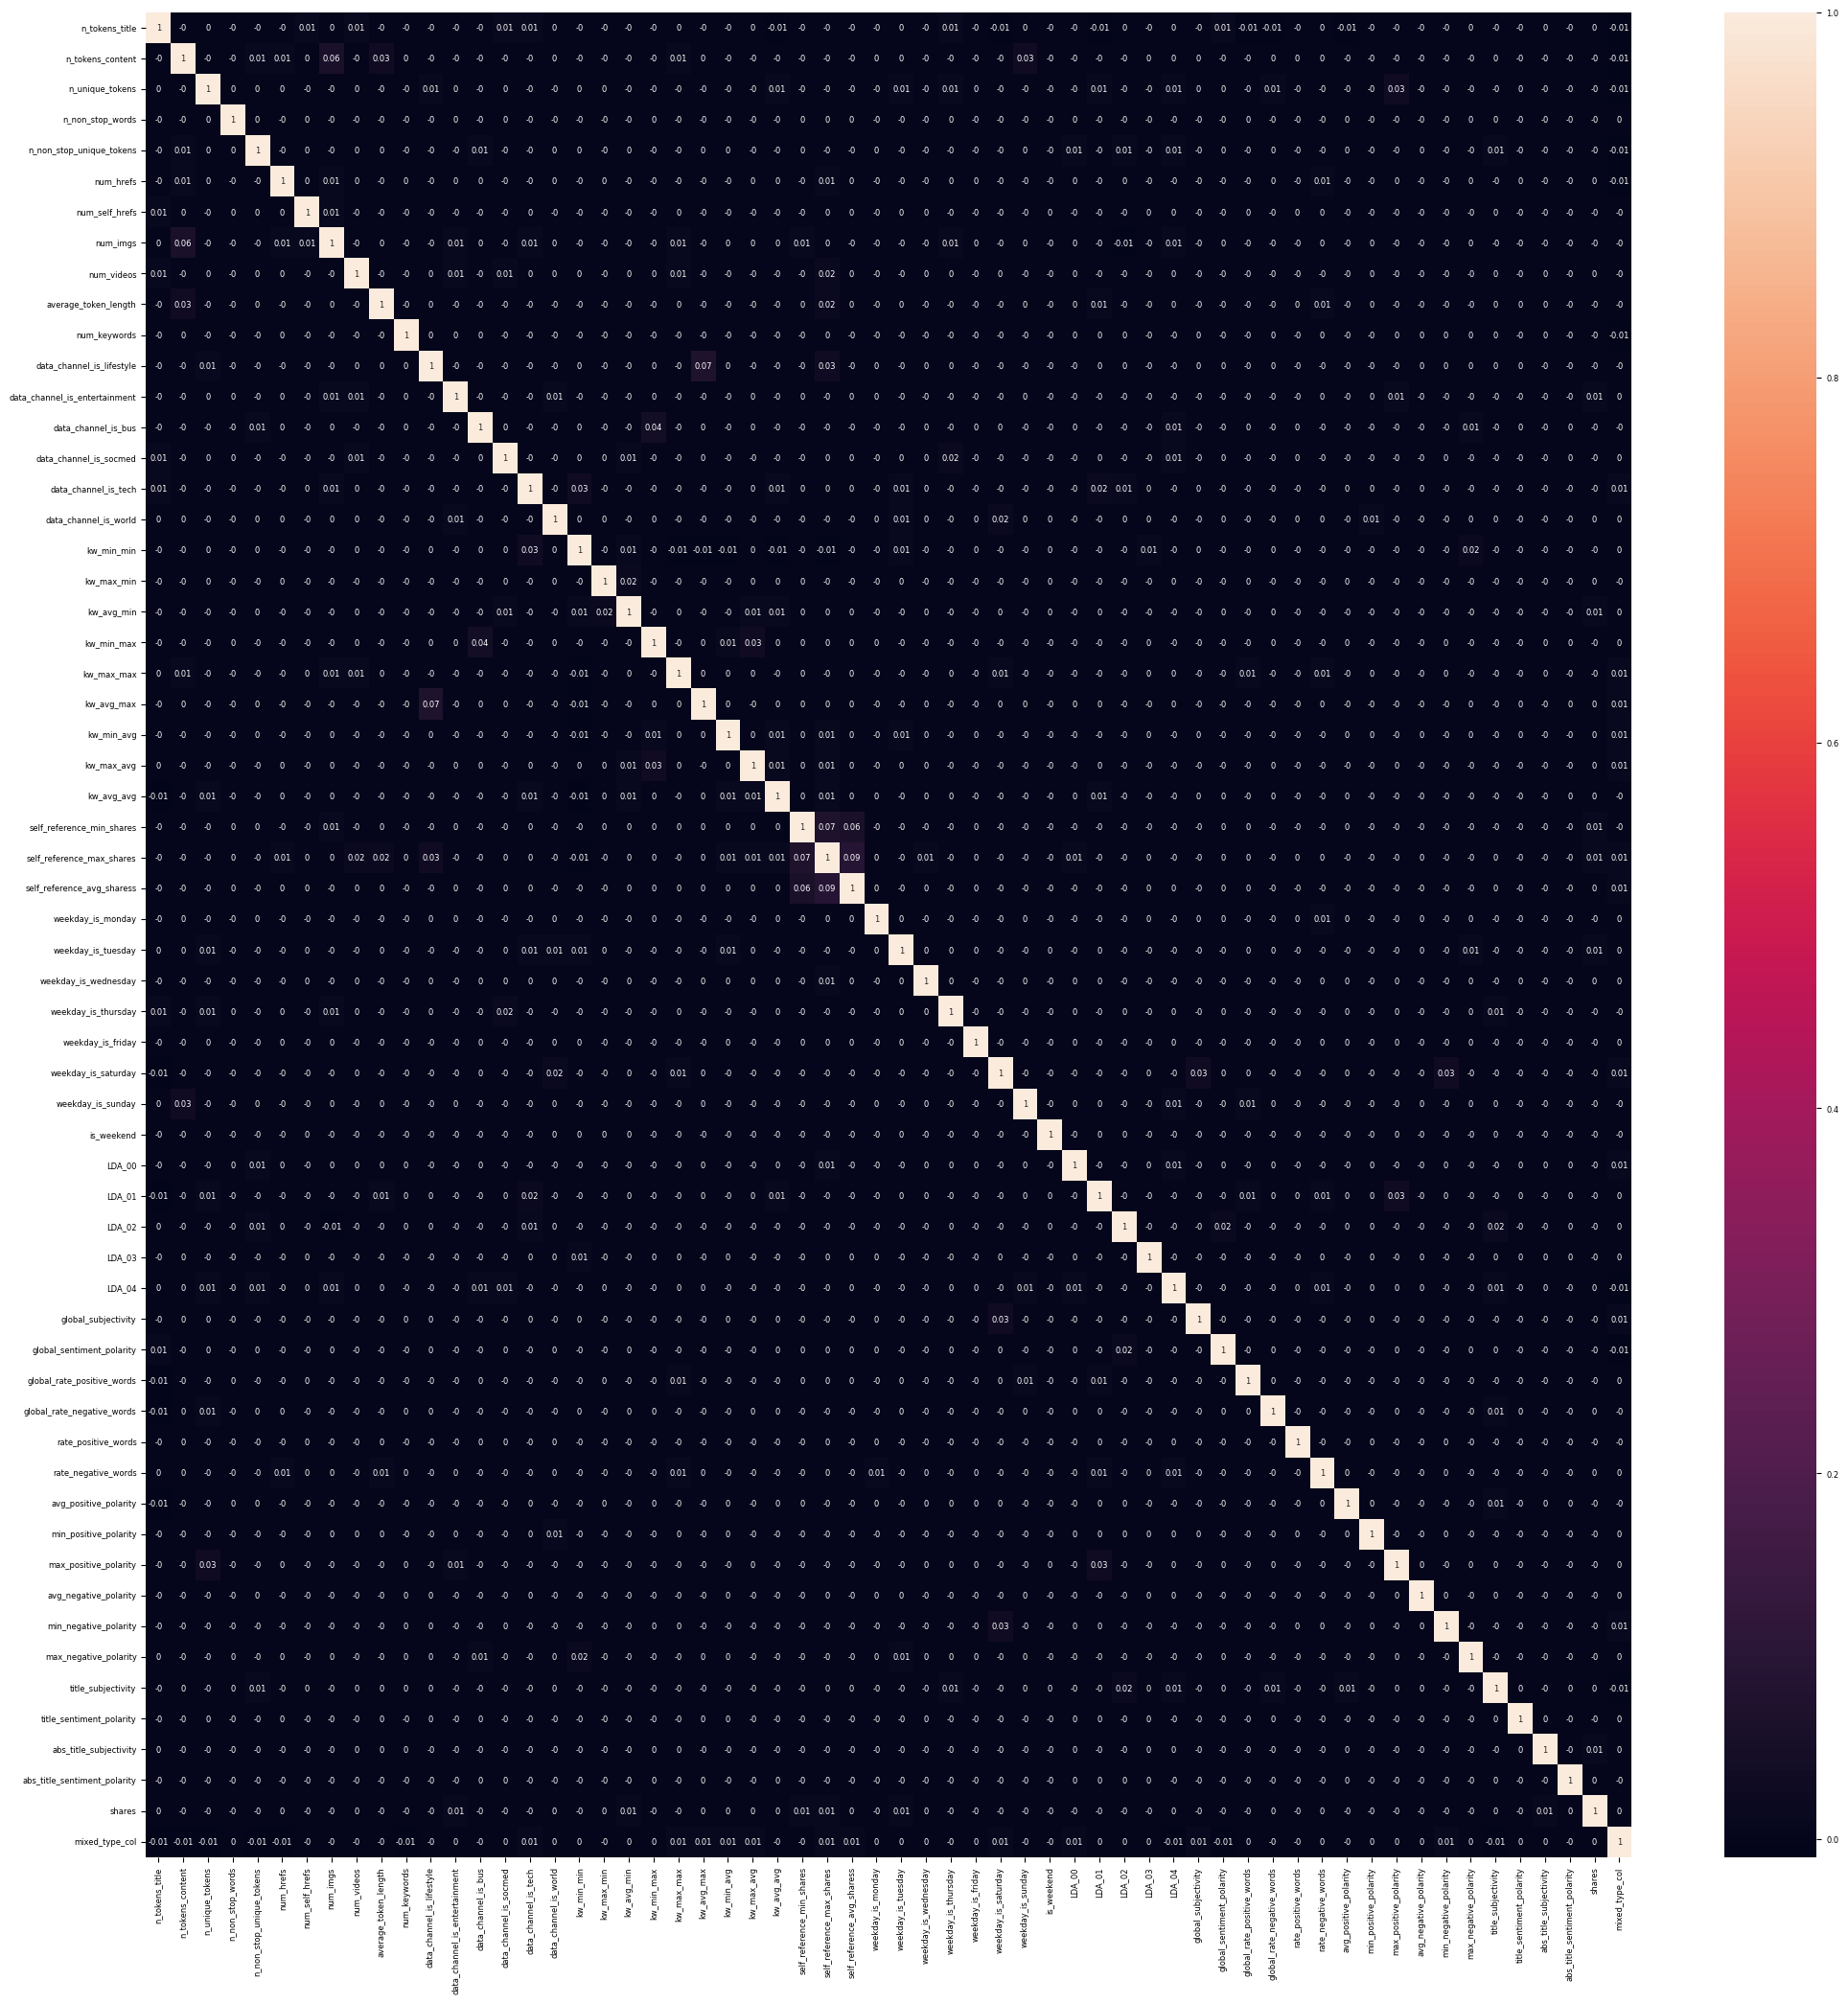

In [25]:
plt.rcParams.update({'font.size': 6})
plt.figure(figsize = (25, 25))
sns.heatmap(round(df_numeric.corr(numeric_only=True),2), annot = True)

No se logran aprecias, bloques de tono o correlaciones directas entre variables

In [26]:
# Apply clipping to outliers for all features except 'shares'
outlier_percentages = {}
for col in df_numeric.columns:
    if col != 'shares':
        Q1 = df_numeric[col].quantile(0.25)
        Q3 = df_numeric[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df_numeric[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)]
        # Calculate the percentage of outliers
        percentage = (len(outliers) / len(df_numeric)) * 100
        outlier_percentages[col] = percentage


        df_numeric[col] = df_numeric[col].clip(lower=lower_bound, upper=upper_bound)

# Print the results
for col, percentage in outlier_percentages.items():
    print(f"Porcentaje de outliers en '{col}': {percentage:.2f}%")

# Get all the percentage values from the dictionary
percentages = outlier_percentages.values()

# Calculate the mean of the percentages
mean_percentage = sum(percentages) / len(percentages)

print(f"\nPromedio de porcentaje de outliers: {mean_percentage:.2f}%")



Porcentaje de outliers en 'n_tokens_title': 1.41%
Porcentaje de outliers en 'n_tokens_content': 5.29%
Porcentaje de outliers en 'n_unique_tokens': 4.98%
Porcentaje de outliers en 'n_non_stop_words': 8.14%
Porcentaje de outliers en 'n_non_stop_unique_tokens': 5.27%
Porcentaje de outliers en 'num_hrefs': 6.33%
Porcentaje de outliers en 'num_self_hrefs': 6.08%
Porcentaje de outliers en 'num_imgs': 19.81%
Porcentaje de outliers en 'num_videos': 7.86%
Porcentaje de outliers en 'average_token_length': 5.13%
Porcentaje de outliers en 'num_keywords': 1.11%
Porcentaje de outliers en 'data_channel_is_lifestyle': 5.70%
Porcentaje de outliers en 'data_channel_is_entertainment': 17.90%
Porcentaje de outliers en 'data_channel_is_bus': 16.01%
Porcentaje de outliers en 'data_channel_is_socmed': 6.23%
Porcentaje de outliers en 'data_channel_is_tech': 18.59%
Porcentaje de outliers en 'data_channel_is_world': 21.30%
Porcentaje de outliers en 'kw_min_min': 12.44%
Porcentaje de outliers en 'kw_max_min': 9.

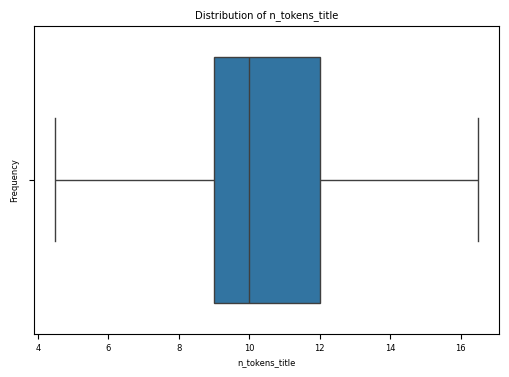

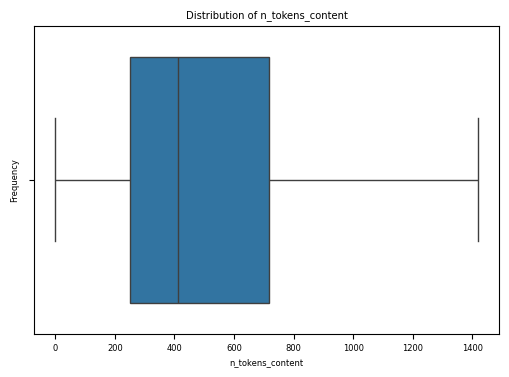

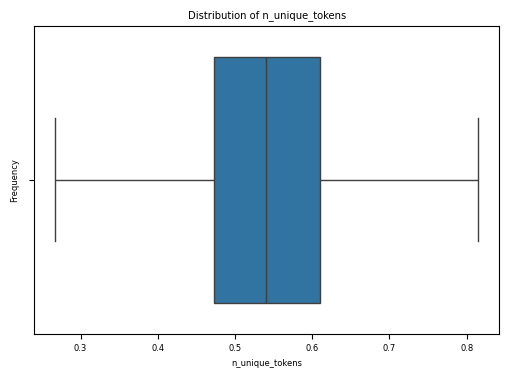

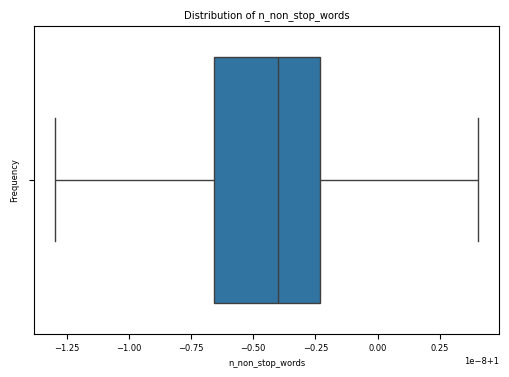

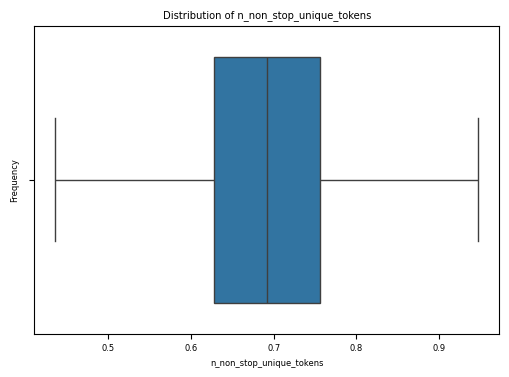

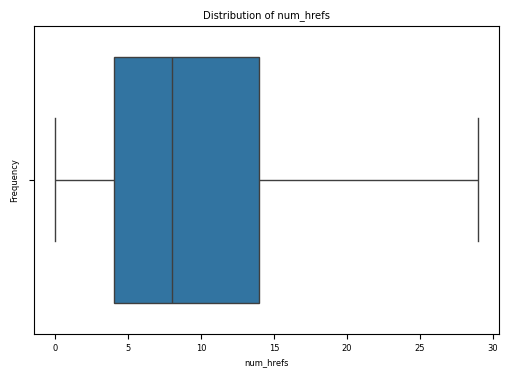

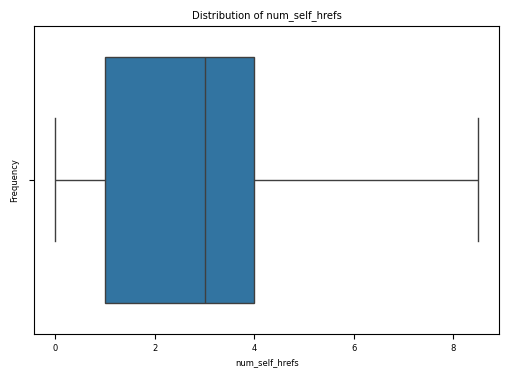

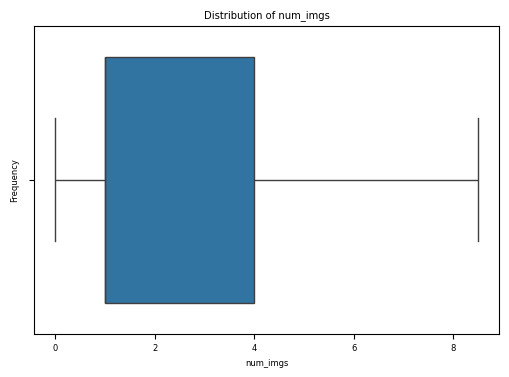

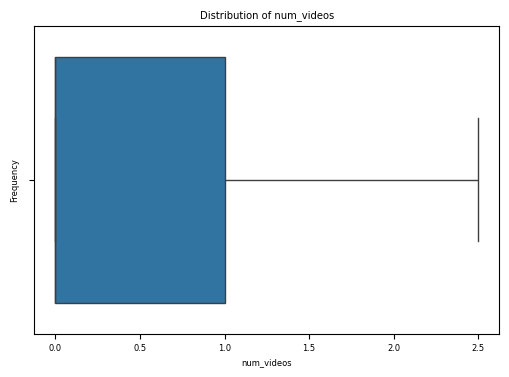

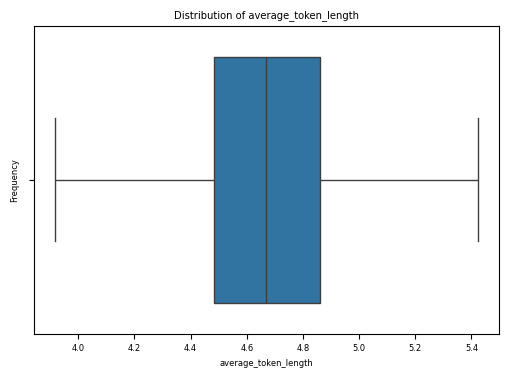

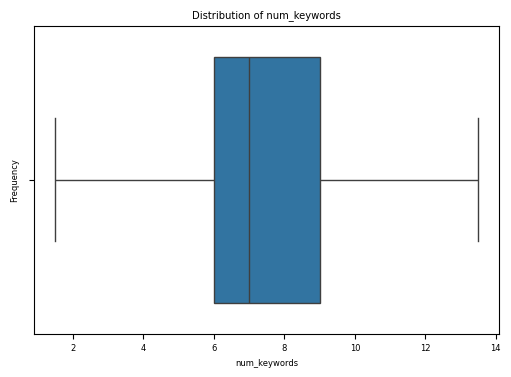

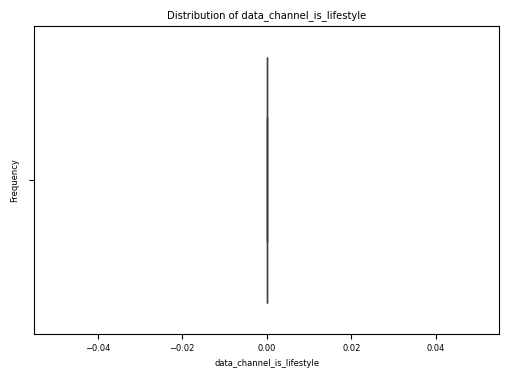

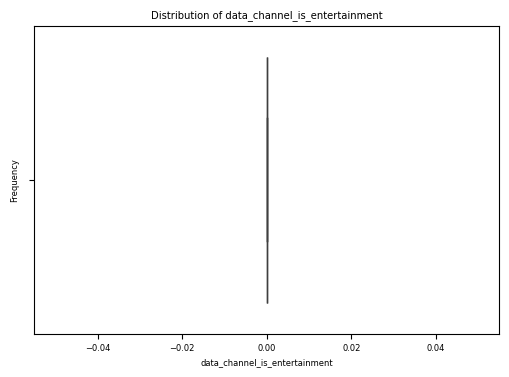

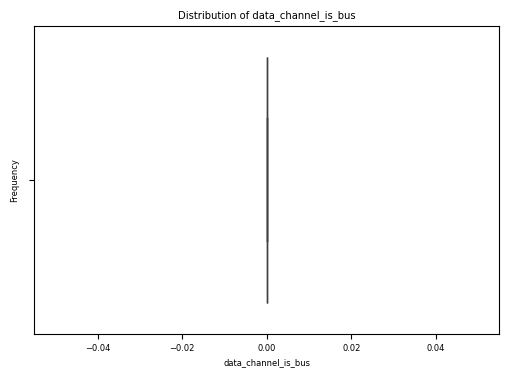

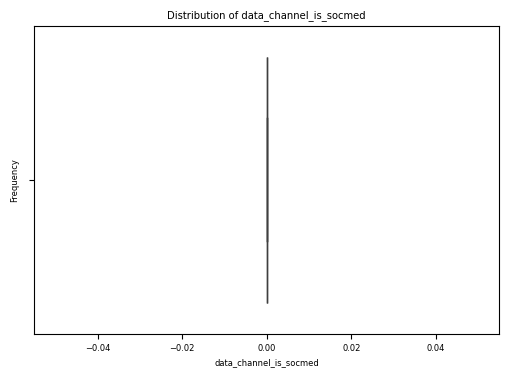

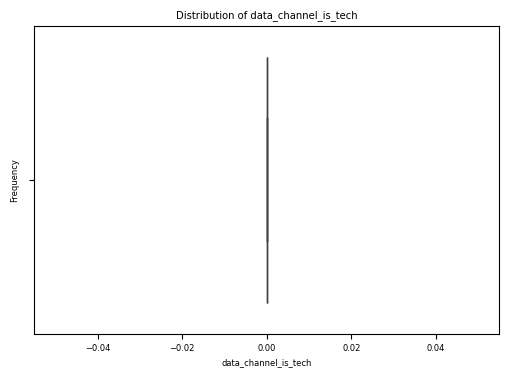

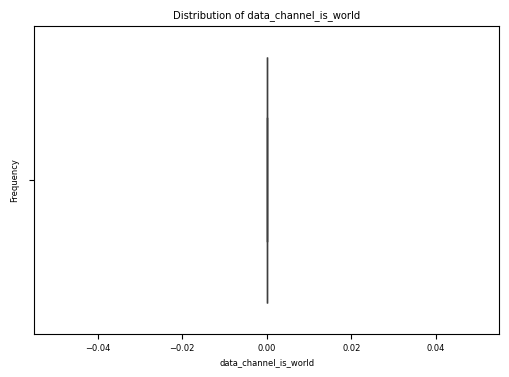

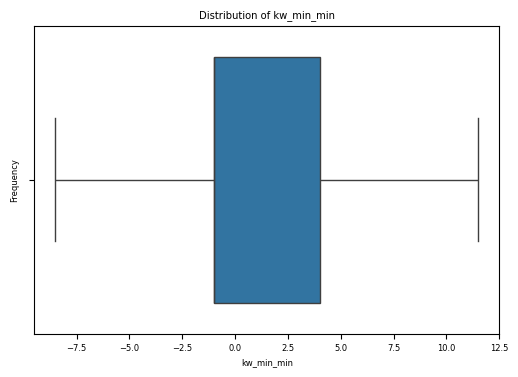

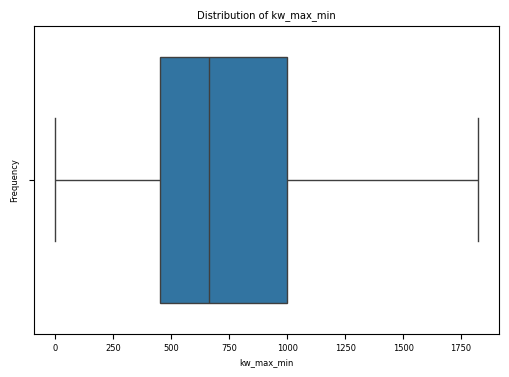

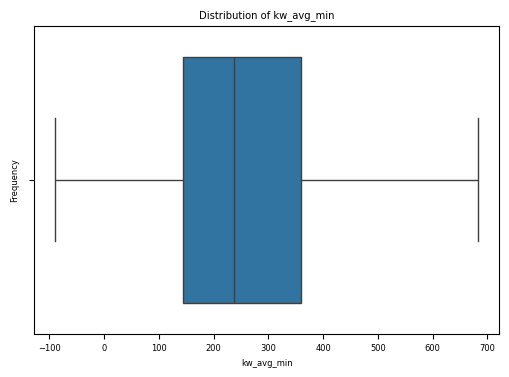

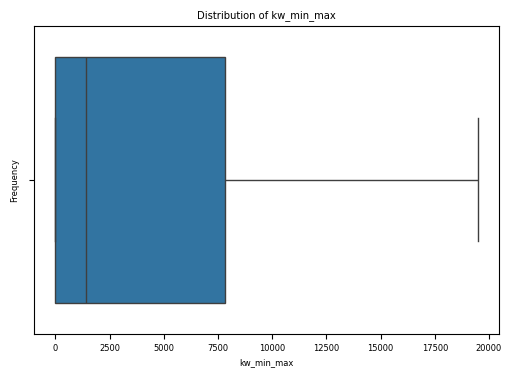

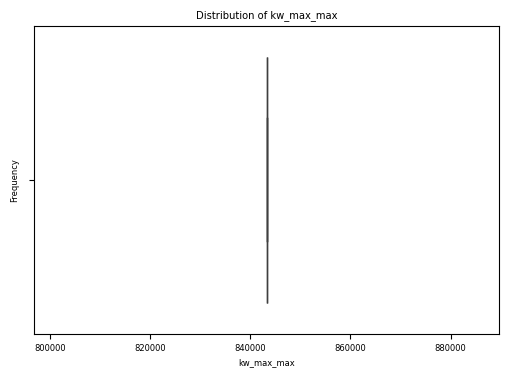

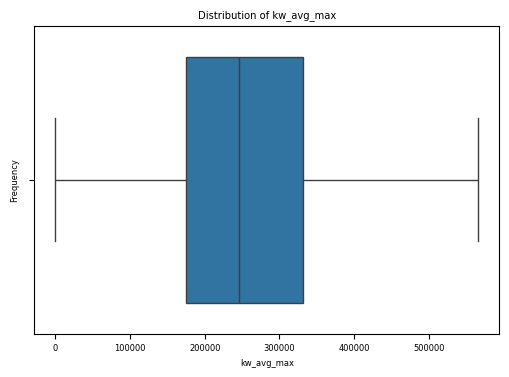

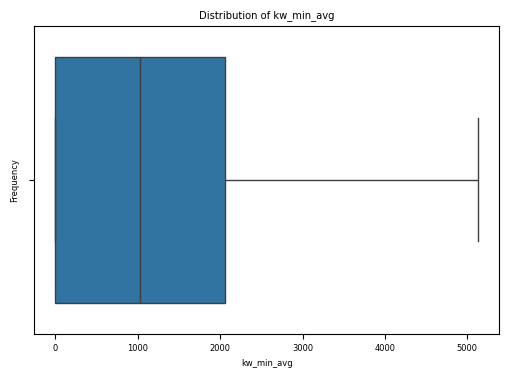

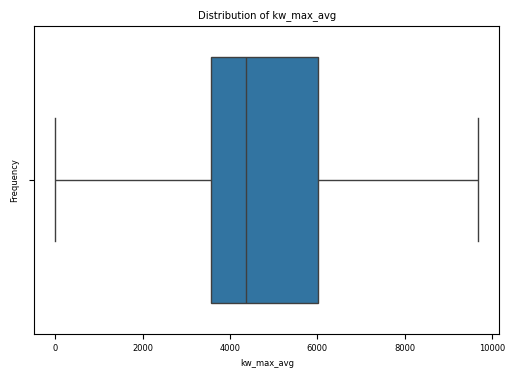

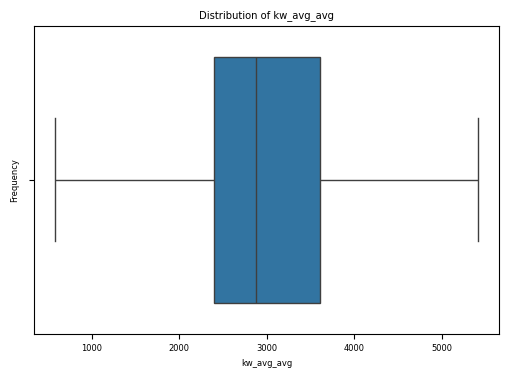

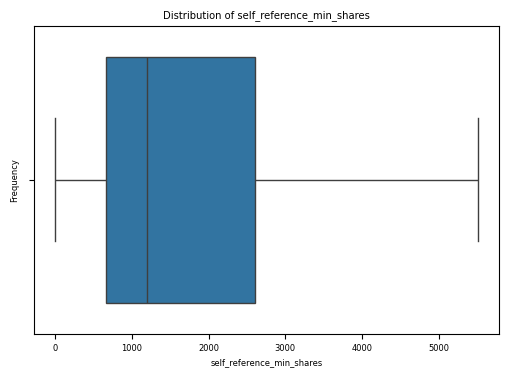

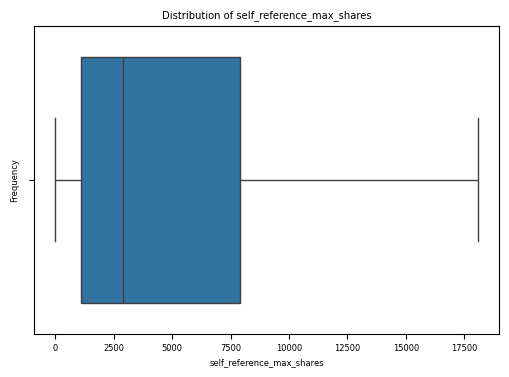

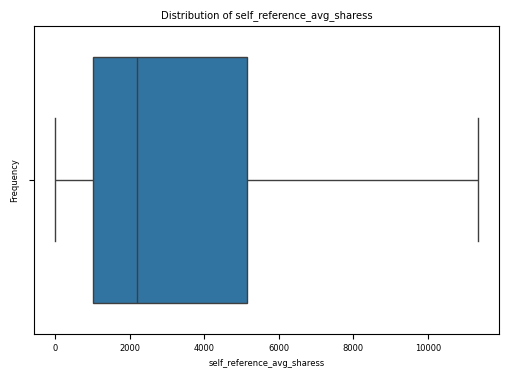

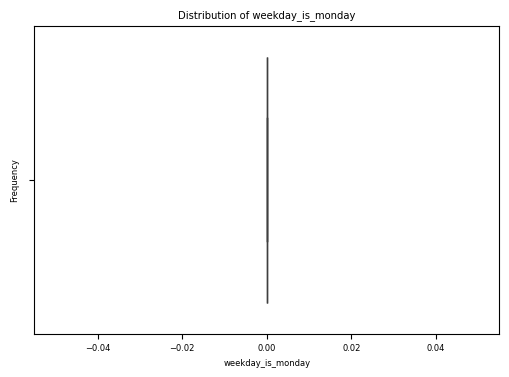

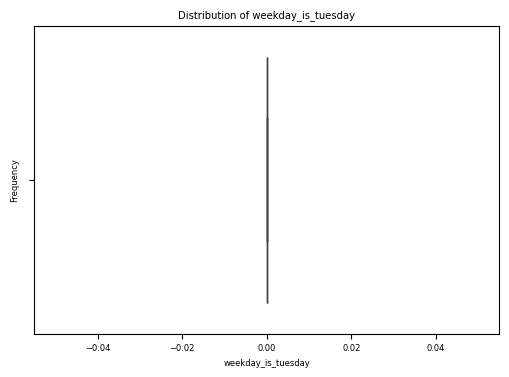

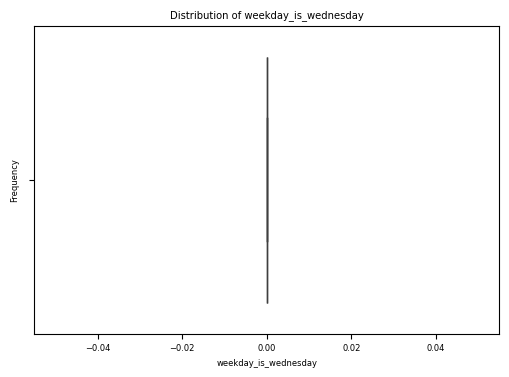

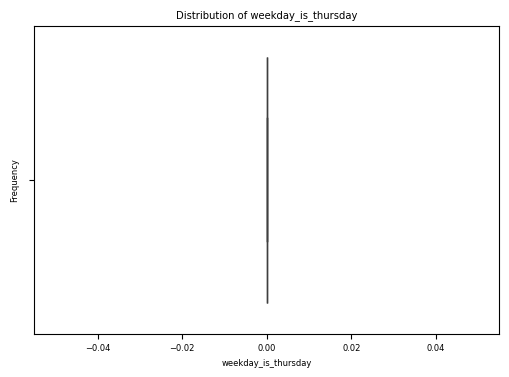

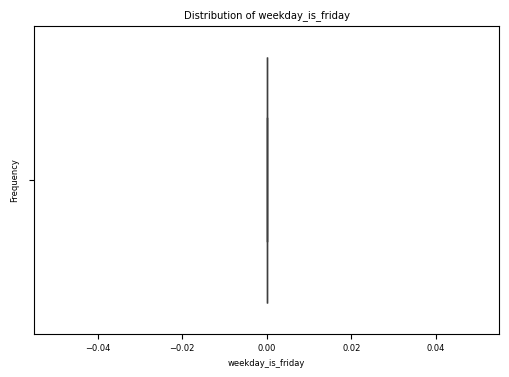

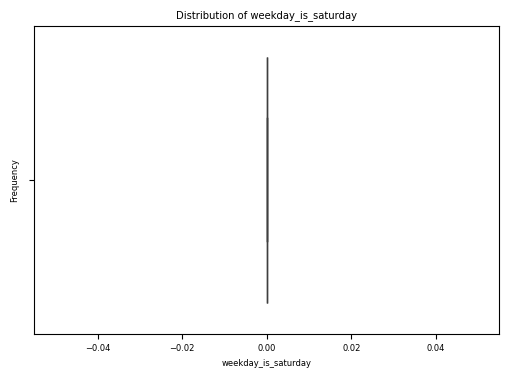

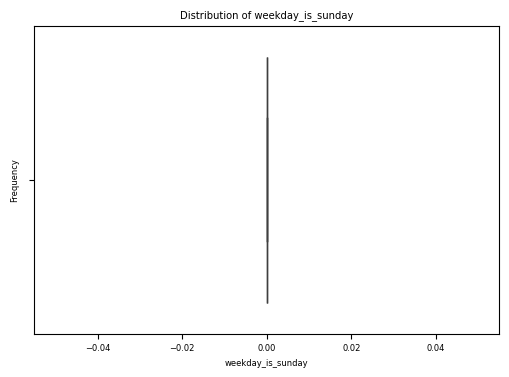

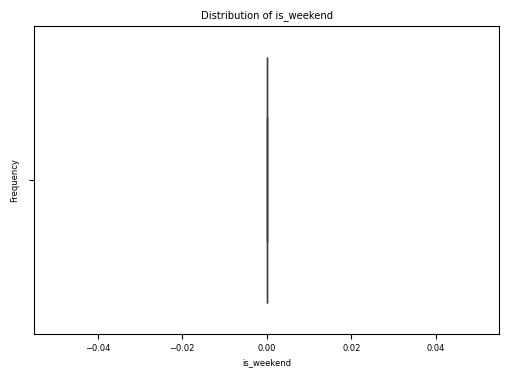

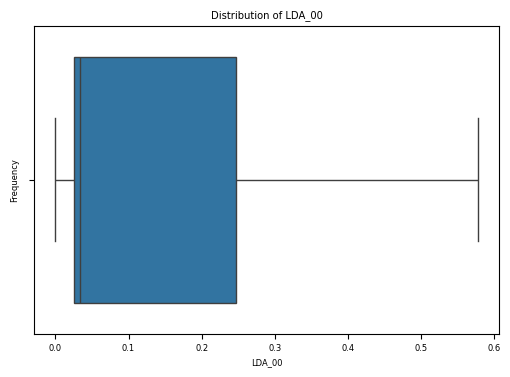

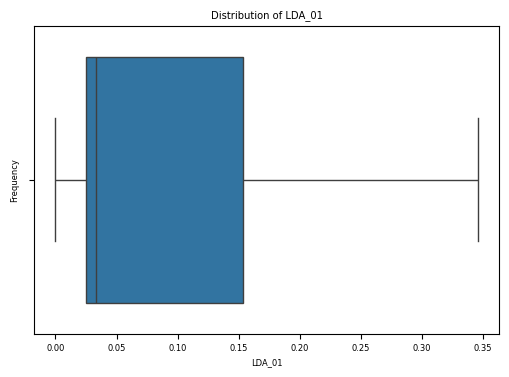

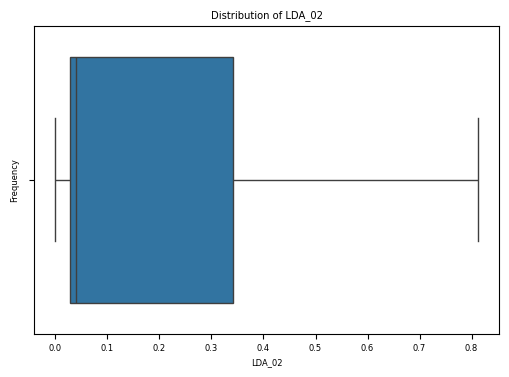

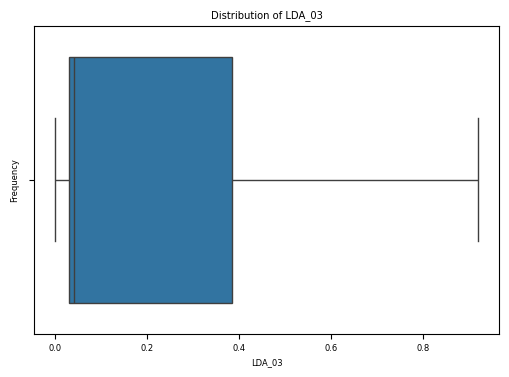

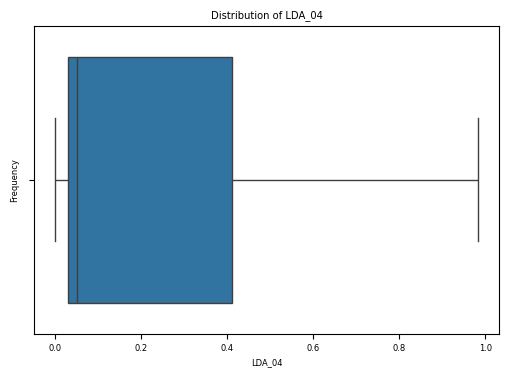

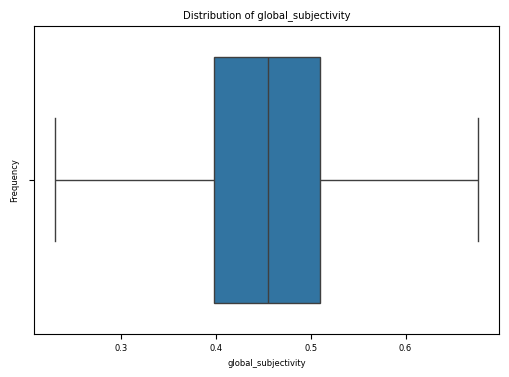

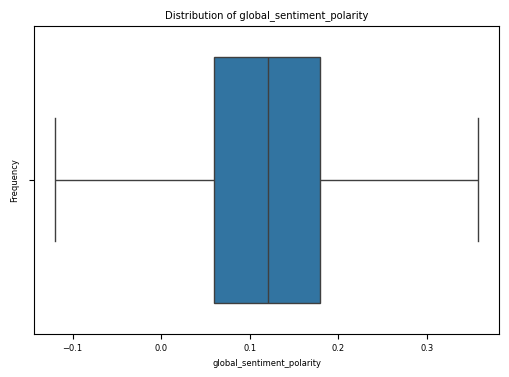

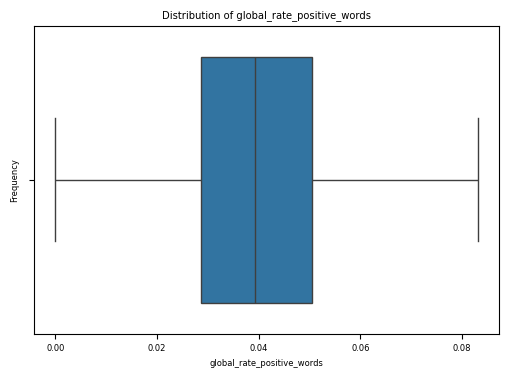

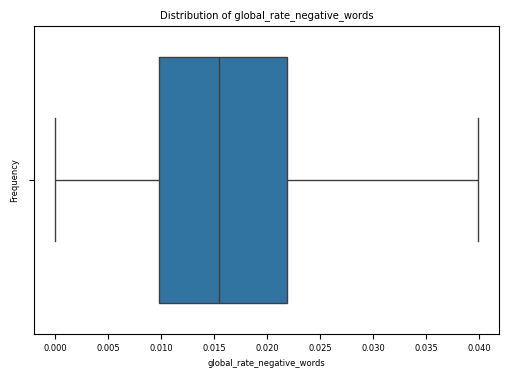

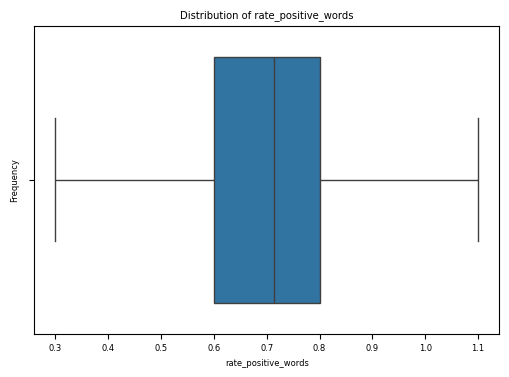

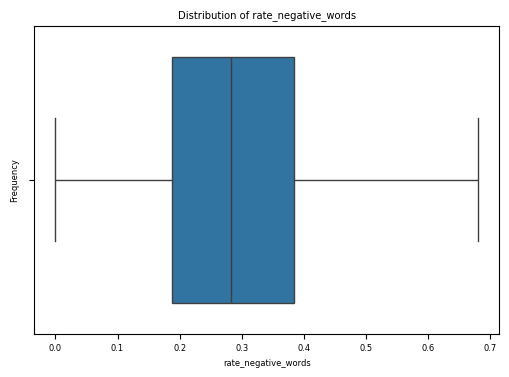

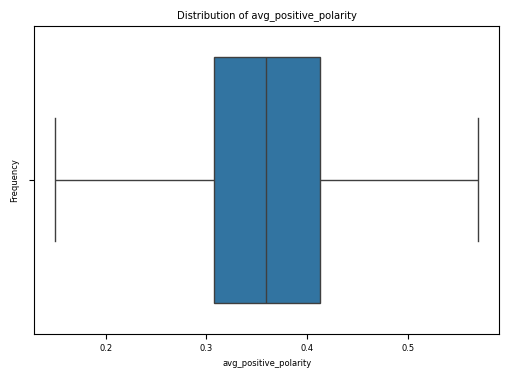

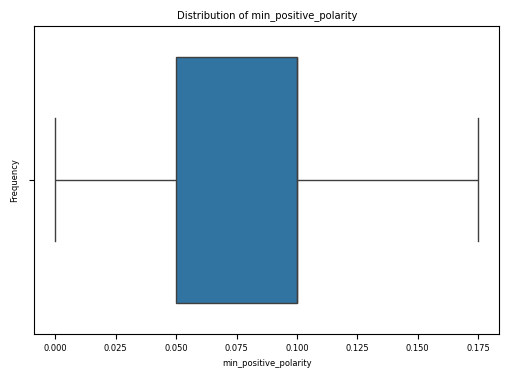

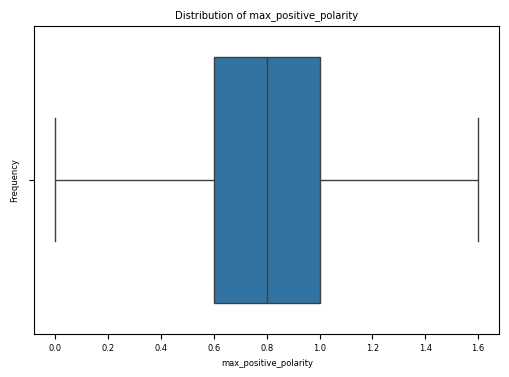

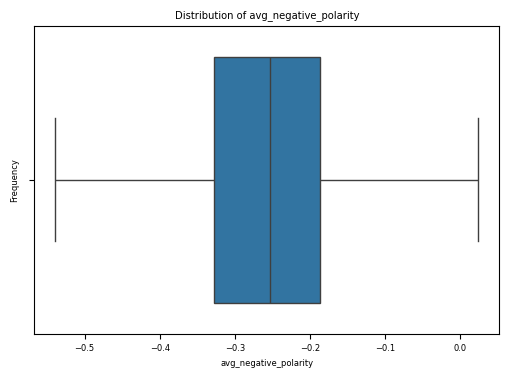

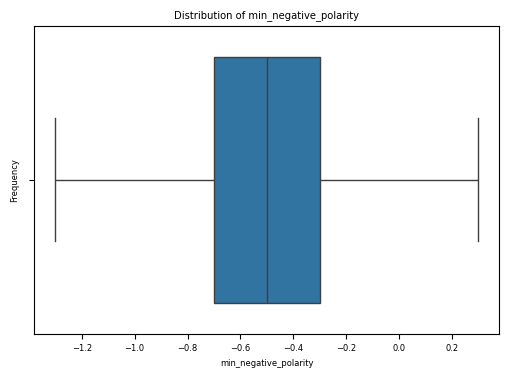

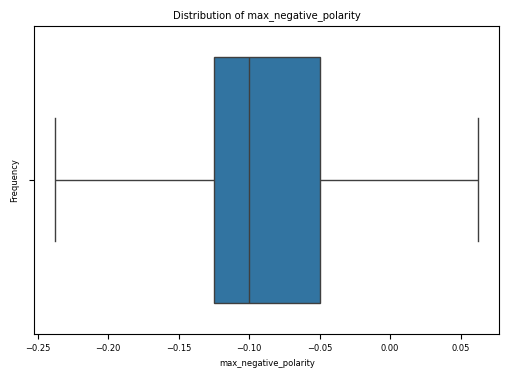

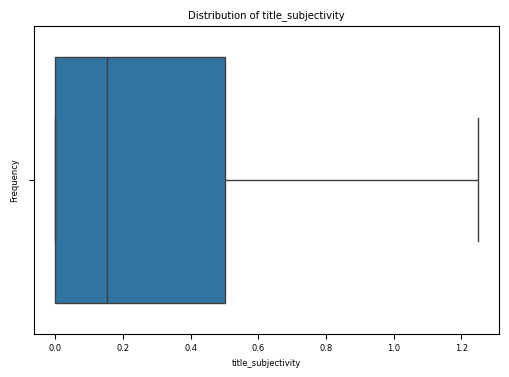

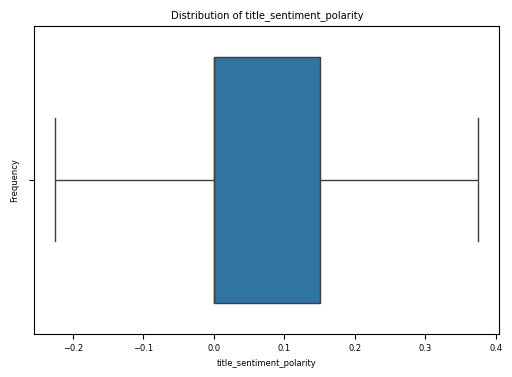

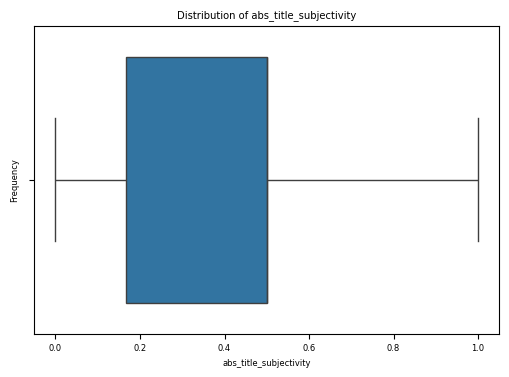

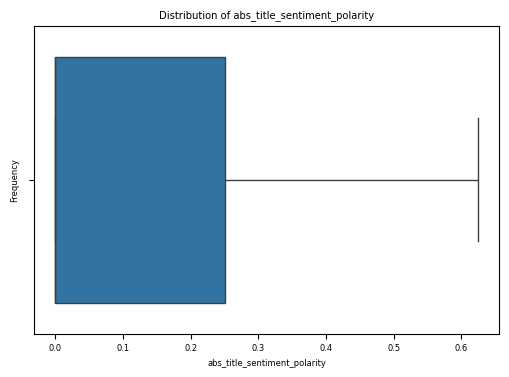

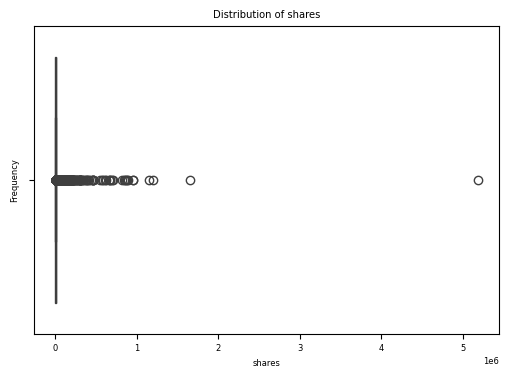

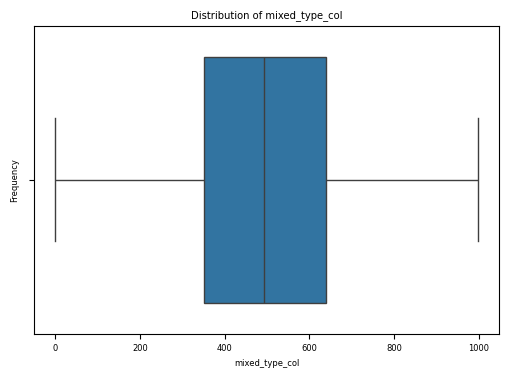

In [27]:
for col in df_numeric.columns:
    plt.figure(figsize=(6, 4)) # Reduced figure size
    # sns.histplot(df_numeric[col], kde=True, bins=50) # Added fixed number of bins
    sns.boxplot(x=df_numeric[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    plt.close() # Close the figure to free memory

<Axes: >

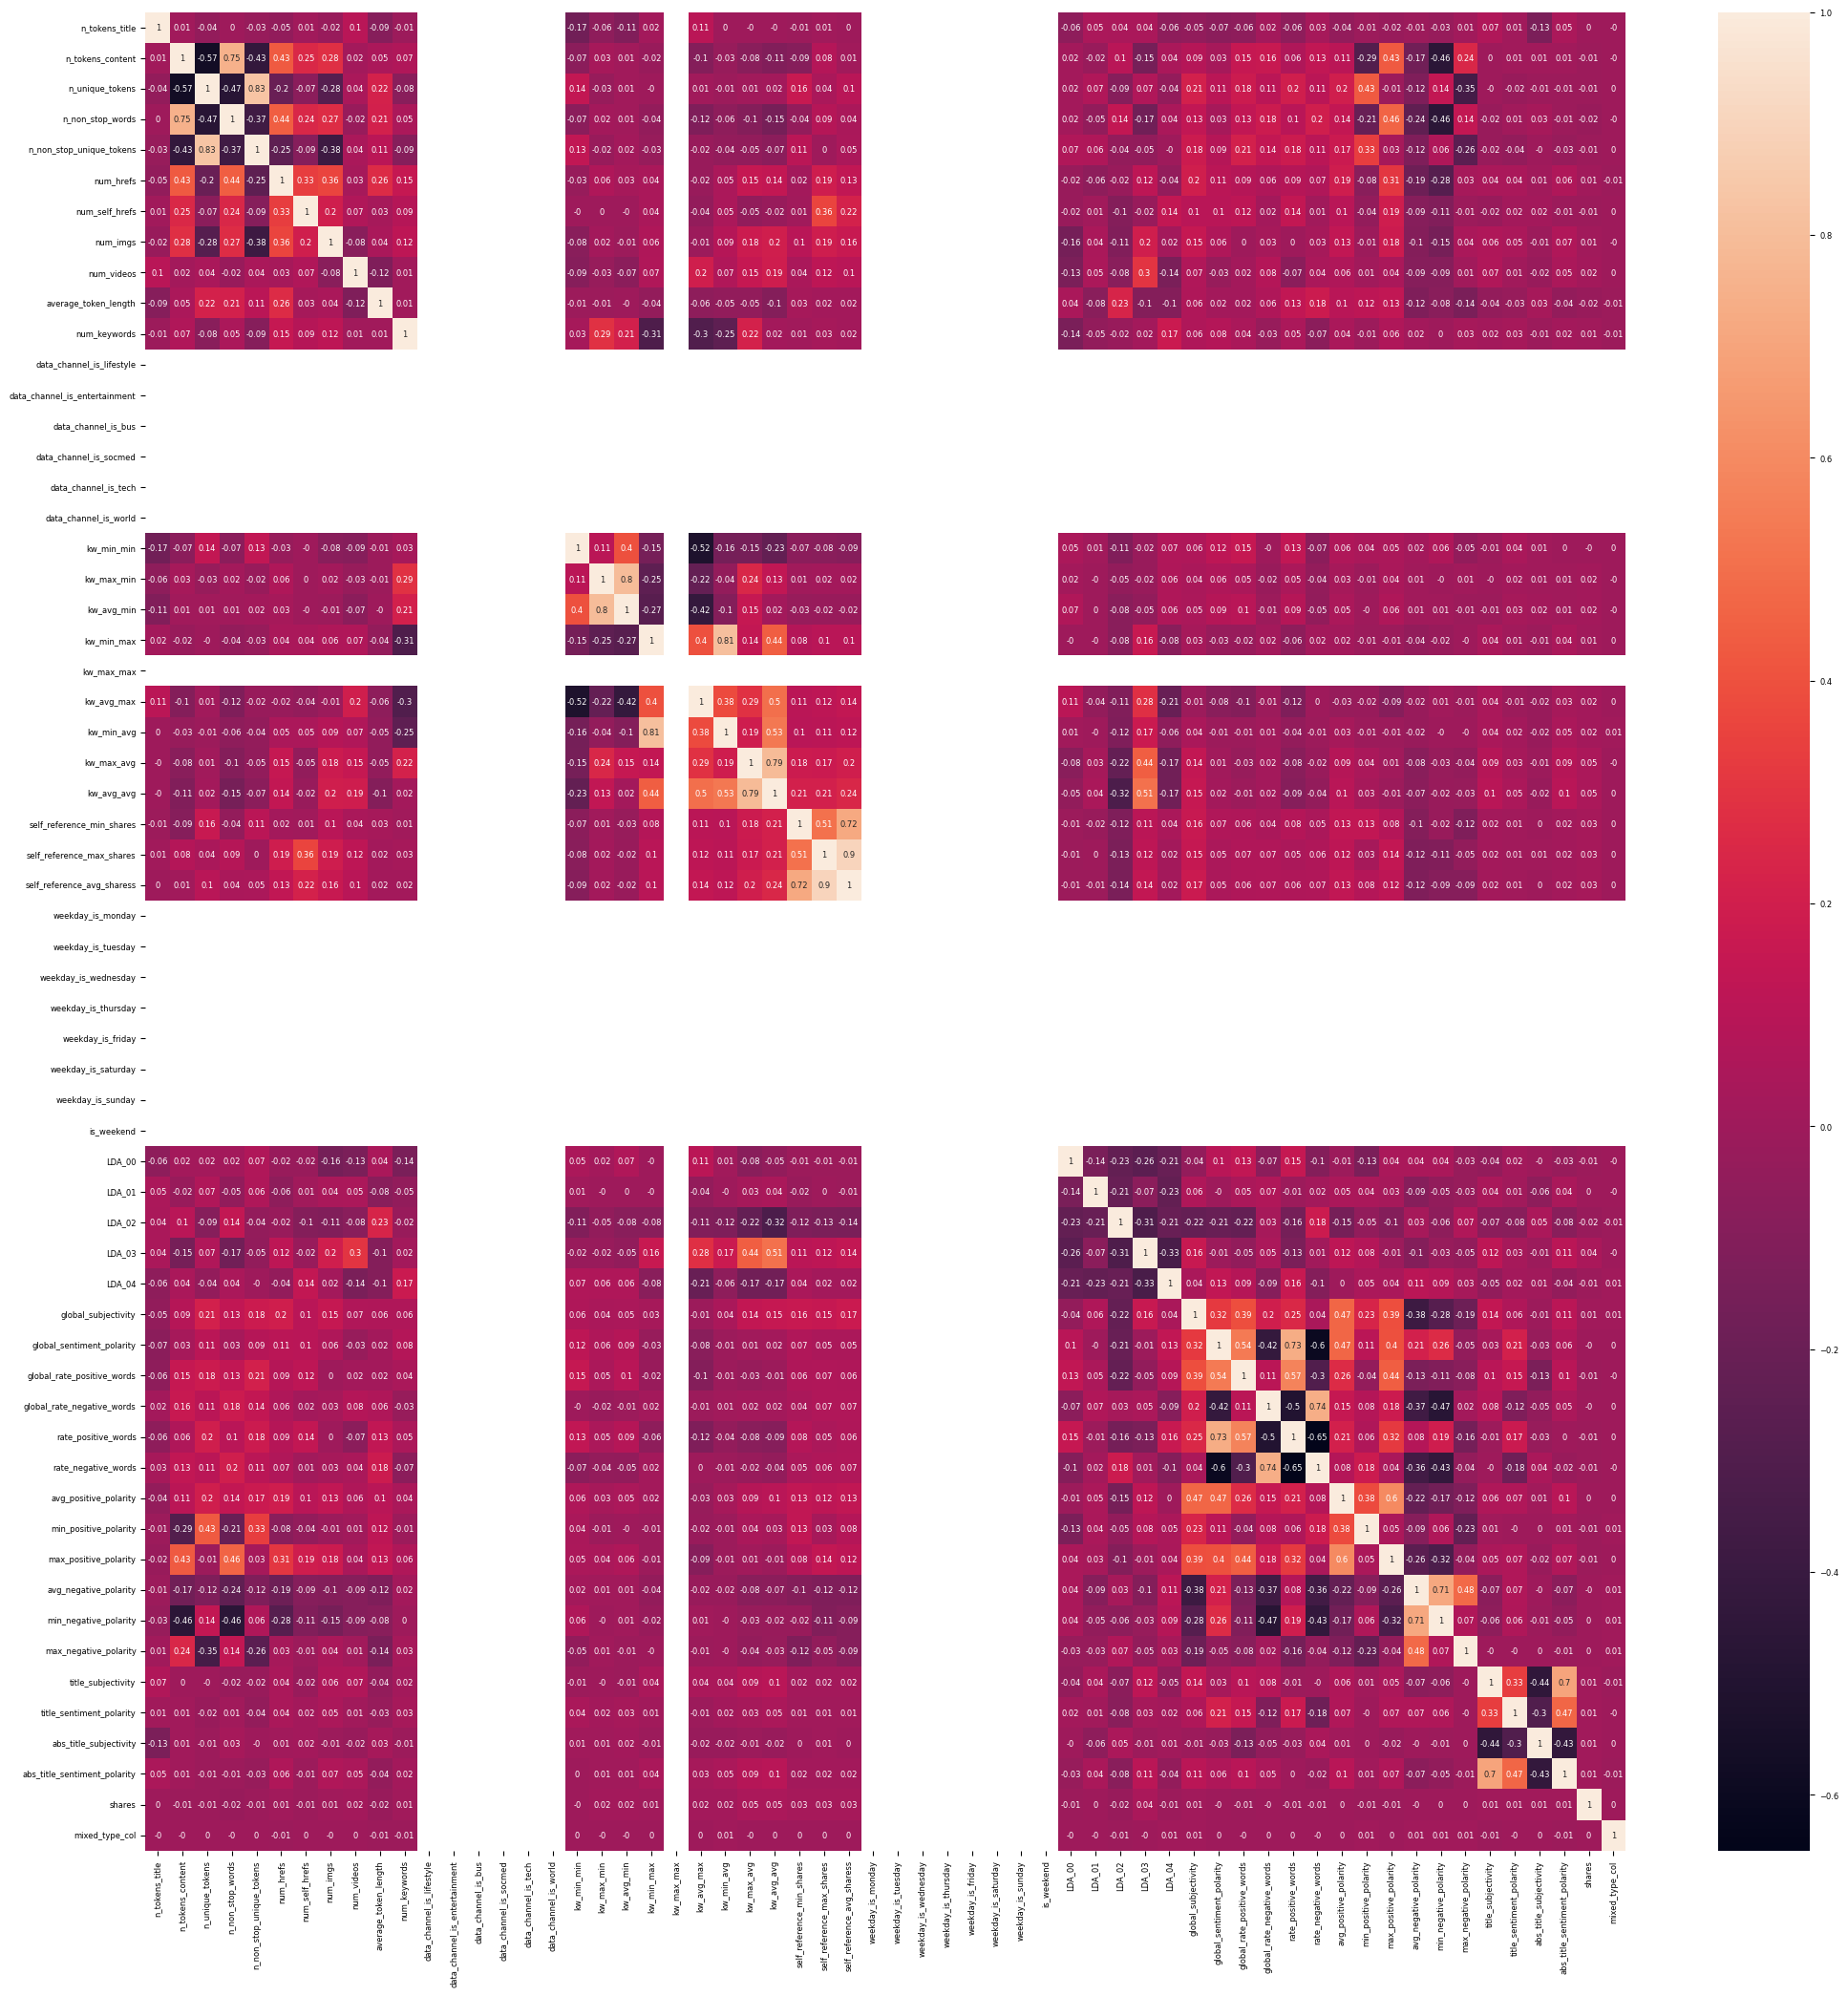

In [28]:
plt.rcParams.update({'font.size': 6})
plt.figure(figsize = (25, 25))
sns.heatmap(round(df_numeric.corr(numeric_only=True),2), annot = True)

In [41]:
# --- General Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import mlflow
from optuna.integration.mlflow import MLflowCallback
import tempfile, os

# --- Scikit-learn Imports ---
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# --- Models (Classifiers) ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
import xgboost as xgb
import lightgbm as lgb

# --- Metrics ---
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

print("Sample DataFrame head:")
df_numeric.head()

Sample DataFrame head:


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,mixed_type_col,popular
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,584.68884,496.0,496.0,496.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.345876,0.040005,0.041263,0.040123,0.521617,0.358029,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.237500,0.500000,-0.187500,0.000000,0.187500,593.0,493.0,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,584.68884,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.578138,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.175000,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0,639.0,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,584.68884,918.0,918.0,918.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.676631,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0,493.0,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,584.68884,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.345876,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0,688.0,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,8.5,8.5,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,843300.0,0.0,0.0,0.0,584.68884,545.0,16000.0,3151.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0,579.0,0


In [42]:
# --- Step 1: Handle Missing Values in the Target ---
print(f"Filas antes de limpiar: {len(df_numeric)}")
print(f"Numero de filas con 'shares' faltantes: {df_numeric['shares'].isnull().sum()}")

# Drop rows where the target 'shares' is NaN.
df_numeric.dropna(subset=['shares'], inplace=True)

print(f"Filas después de limpiar: {len(df_numeric)}")

# --- Step 2: Create the Binary Classification Target ---
# As defined by the paper, using the median value as the threshold.
threshold = df_numeric['shares'].median()
print(f"\nUsando un umbral de popularidad de {threshold:.0f} shares (la mediana).")

df_numeric['popular'] = (df_numeric['shares'] > threshold).astype(int)

print("\nNueva distribución de clases binarias (debería estar equilibrada):")
print(df_numeric['popular'].value_counts(normalize=True))

# --- Step 3: Define Final X and y for the Binary Task ---
X = df_numeric.drop(['shares', 'popular'], axis=1)
y = df_numeric['popular'] # <-- THE NEW BINARY TARGET

# --- Step 4: Create Train and Test Splits (Stratification is crucial) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")
print("="*50)

Filas antes de limpiar: 39805
Numero de filas con 'shares' faltantes: 0
Filas después de limpiar: 39805

Usando un umbral de popularidad de 1400 shares (la mediana).

Nueva distribución de clases binarias (debería estar equilibrada):
popular
0    0.502424
1    0.497576
Name: proportion, dtype: float64

Tamaño del conjunto de entrenamiento: 31844
Tamaño del conjunto de prueba: 7961


In [43]:
# --- Establish Binary Classification Baseline Performance ---
print("\n--- Establecemos el rendimiento base ---")

baseline_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', DummyClassifier(strategy='stratified', random_state=42))
])

baseline_pipeline.fit(X_train, y_train)
y_pred_baseline = baseline_pipeline.predict(X_test)

# Calculate and print the baseline metrics
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"\nAccuracy del rendimiento base: {baseline_accuracy:.4f} (Se espera ~50% para 2 clases equilibradas)")
print("\nInforme de Clasificación del Rendimiento Base:")
print(classification_report(y_test, y_pred_baseline))
print("="*50)


--- Establecemos el rendimiento base ---

Accuracy del rendimiento base: 0.5060 (Se espera ~50% para 2 clases equilibradas)

Informe de Clasificación del Rendimiento Base:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      4000
           1       0.50      0.50      0.50      3961

    accuracy                           0.51      7961
   macro avg       0.51      0.51      0.51      7961
weighted avg       0.51      0.51      0.51      7961



Configuramos mlflow para que trabaje junto con optuna

In [50]:
# --- Set up MLflow Experiment ---
mlruns_path = os.path.abspath("mlruns")
study_name = "Online_News_Popularity_Estudio_Optuna"
mlflow.set_tracking_uri(f"{mlruns_path}")  # sin "file://"
mlflow.set_experiment(f"{study_name}")

# Create MLflow callback
mlflow_callback = MLflowCallback(
    tracking_uri=mlflow.get_tracking_uri(),
    metric_name="auc"
)

C:\Users\Diego\AppData\Local\Temp\ipykernel_5388\881082052.py:8: ExperimentalWarning: MLflowCallback is experimental (supported from v1.4.0). The interface can change in the future.
  mlflow_callback = MLflowCallback(


In [52]:
# --- Define the Objective Function for Optuna ---
def objective(trial):
    with mlflow.start_run(nested=True):
        scaler = StandardScaler()
        classifier_name = trial.suggest_categorical('classifier', ['XGBoost', 'LightGBM', 'RandomForest', 'MLP'])

        if classifier_name == 'RandomForest':
            classifier = RandomForestClassifier(
                n_estimators=trial.suggest_int('rf_n_estimators', 50, 400),
                max_depth=trial.suggest_int('rf_max_depth', 5, 30),
                random_state=42, n_jobs=-1
            )
        elif classifier_name == 'MLP':
            classifier = MLPClassifier(
                hidden_layer_sizes=eval(trial.suggest_categorical('mlp_hidden_layers', ['(50,)', '(100,)', '(50, 50)'])),
                alpha=trial.suggest_float('mlp_alpha', 1e-5, 1e-1, log=True),
                max_iter=300, early_stopping=True, random_state=42
            )
        elif classifier_name == 'XGBoost':
            classifier = xgb.XGBClassifier(
                n_estimators=trial.suggest_int('xgb_n_estimators', 100, 800),
                learning_rate=trial.suggest_float('xgb_learning_rate', 0.01, 0.3),
                max_depth=trial.suggest_int('xgb_max_depth', 3, 10),
                objective='binary:logistic', eval_metric='logloss',
                use_label_encoder=False, random_state=42, n_jobs=-1
            )
        elif classifier_name == 'LightGBM':
            classifier = lgb.LGBMClassifier(
                n_estimators=trial.suggest_int('lgbm_n_estimators', 100, 800),
                learning_rate=trial.suggest_float('lgbm_learning_rate', 0.01, 0.3),
                num_leaves=trial.suggest_int('lgbm_num_leaves', 20, 100),
                objective='binary', random_state=42, n_jobs=-1
            )

        pipeline = Pipeline(steps=[('scaler', scaler), ('classifier', classifier)])
        scores = cross_validate(pipeline, X_train, y_train, cv=3, scoring=['roc_auc', 'accuracy'], n_jobs=-1)

        mean_auc = np.mean(scores['test_roc_auc'])
        mean_acc = np.mean(scores['test_accuracy'])
        trial.set_user_attr("accuracy", mean_acc)

        # --- Log everything to MLflow ---
        mlflow.log_param("classifier", classifier_name)
        for param_name, param_value in trial.params.items():
            mlflow.log_param(param_name, param_value)

        mlflow.log_metric("auc", mean_auc)
        mlflow.log_metric("accuracy", mean_acc)

        return mean_auc

def print_metrics_callback(study, trial):
    print(f"Trial {trial.number} finished. AUC: {trial.value:.4f}, Accuracy: {trial.user_attrs['accuracy']:.4f}")

# --- Run the Optuna Study ---
study = optuna.create_study(direction='maximize', study_name=study_name) # We want to MAXIMIZE AUC
study.optimize(objective, n_trials=50, n_jobs=1, callbacks=[print_metrics_callback, mlflow_callback])

# --- Print the Best Results ---
print("\n" + "="*50)
print("Optuna Study Finished")
best_trial = study.best_trial
print(f"Best trial found (AUC: {best_trial.value:.4f}):")
print(f"  CV Accuracy: {best_trial.user_attrs.get('accuracy'):.4f}")
print("\n  Best Parameters: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

[I 2025-10-11 14:37:18,934] A new study created in memory with name: Online_News_Popularity_Estudio_Optuna
[I 2025-10-11 14:37:46,447] Trial 0 finished with value: 0.7093071330687218 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 237, 'rf_max_depth': 23}. Best is trial 0 with value: 0.7093071330687218.


Trial 0 finished. AUC: 0.7093, Accuracy: 0.6532


[I 2025-10-11 14:38:02,016] Trial 1 finished with value: 0.6934177169646789 and parameters: {'classifier': 'LightGBM', 'lgbm_n_estimators': 334, 'lgbm_learning_rate': 0.1420920648172726, 'lgbm_num_leaves': 87}. Best is trial 0 with value: 0.7093071330687218.


Trial 1 finished. AUC: 0.6934, Accuracy: 0.6405


[I 2025-10-11 14:38:12,838] Trial 2 finished with value: 0.680549922951491 and parameters: {'classifier': 'MLP', 'mlp_hidden_layers': '(50, 50)', 'mlp_alpha': 0.0006618495016907069}. Best is trial 0 with value: 0.7093071330687218.


Trial 2 finished. AUC: 0.6805, Accuracy: 0.6306


[I 2025-10-11 14:38:26,294] Trial 3 finished with value: 0.6911537121552408 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 217, 'rf_max_depth': 7}. Best is trial 0 with value: 0.7093071330687218.


Trial 3 finished. AUC: 0.6912, Accuracy: 0.6400


[I 2025-10-11 14:38:34,384] Trial 4 finished with value: 0.6876449538554249 and parameters: {'classifier': 'MLP', 'mlp_hidden_layers': '(50,)', 'mlp_alpha': 1.2859703902351466e-05}. Best is trial 0 with value: 0.7093071330687218.


Trial 4 finished. AUC: 0.6876, Accuracy: 0.6376


[I 2025-10-11 14:38:50,187] Trial 5 finished with value: 0.700300211060494 and parameters: {'classifier': 'LightGBM', 'lgbm_n_estimators': 744, 'lgbm_learning_rate': 0.08021771012575411, 'lgbm_num_leaves': 24}. Best is trial 0 with value: 0.7093071330687218.


Trial 5 finished. AUC: 0.7003, Accuracy: 0.6460


[I 2025-10-11 14:39:22,305] Trial 6 finished with value: 0.709013486764762 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 258, 'rf_max_depth': 28}. Best is trial 0 with value: 0.7093071330687218.


Trial 6 finished. AUC: 0.7090, Accuracy: 0.6525


[I 2025-10-11 14:39:56,658] Trial 7 finished with value: 0.6978211324951547 and parameters: {'classifier': 'XGBoost', 'xgb_n_estimators': 573, 'xgb_learning_rate': 0.15670220120455203, 'xgb_max_depth': 9}. Best is trial 0 with value: 0.7093071330687218.


Trial 7 finished. AUC: 0.6978, Accuracy: 0.6422


[I 2025-10-11 14:40:02,656] Trial 8 finished with value: 0.6793582748348271 and parameters: {'classifier': 'MLP', 'mlp_hidden_layers': '(50, 50)', 'mlp_alpha': 0.0001355910166882071}. Best is trial 0 with value: 0.7093071330687218.


Trial 8 finished. AUC: 0.6794, Accuracy: 0.6289


[I 2025-10-11 14:40:33,617] Trial 9 finished with value: 0.706087029082163 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 326, 'rf_max_depth': 13}. Best is trial 0 with value: 0.7093071330687218.


Trial 9 finished. AUC: 0.7061, Accuracy: 0.6510


[I 2025-10-11 14:40:37,731] Trial 10 finished with value: 0.6796574539615063 and parameters: {'classifier': 'XGBoost', 'xgb_n_estimators': 153, 'xgb_learning_rate': 0.010938847010848157, 'xgb_max_depth': 3}. Best is trial 0 with value: 0.7093071330687218.


Trial 10 finished. AUC: 0.6797, Accuracy: 0.6274


[I 2025-10-11 14:41:05,861] Trial 11 finished with value: 0.7086349918547986 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 222, 'rf_max_depth': 29}. Best is trial 0 with value: 0.7093071330687218.


Trial 11 finished. AUC: 0.7086, Accuracy: 0.6507


[I 2025-10-11 14:41:18,652] Trial 12 finished with value: 0.7026327104070466 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 95, 'rf_max_depth': 27}. Best is trial 0 with value: 0.7093071330687218.


Trial 12 finished. AUC: 0.7026, Accuracy: 0.6480


[I 2025-10-11 14:41:54,605] Trial 13 finished with value: 0.7096353636174818 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 314, 'rf_max_depth': 22}. Best is trial 13 with value: 0.7096353636174818.


Trial 13 finished. AUC: 0.7096, Accuracy: 0.6531


[I 2025-10-11 14:42:35,287] Trial 14 finished with value: 0.7095152503361973 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 384, 'rf_max_depth': 19}. Best is trial 13 with value: 0.7096353636174818.


Trial 14 finished. AUC: 0.7095, Accuracy: 0.6522


[I 2025-10-11 14:43:18,385] Trial 15 finished with value: 0.7096579950305036 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 399, 'rf_max_depth': 19}. Best is trial 15 with value: 0.7096579950305036.


Trial 15 finished. AUC: 0.7097, Accuracy: 0.6528


[I 2025-10-11 14:43:59,731] Trial 16 finished with value: 0.7094493076444642 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 400, 'rf_max_depth': 17}. Best is trial 15 with value: 0.7096579950305036.


Trial 16 finished. AUC: 0.7094, Accuracy: 0.6531


[I 2025-10-11 14:44:07,465] Trial 17 finished with value: 0.6814655775234323 and parameters: {'classifier': 'LightGBM', 'lgbm_n_estimators': 107, 'lgbm_learning_rate': 0.2792928719447965, 'lgbm_num_leaves': 40}. Best is trial 15 with value: 0.7096579950305036.


Trial 17 finished. AUC: 0.6815, Accuracy: 0.6316


[I 2025-10-11 14:44:19,468] Trial 18 finished with value: 0.6787793680434048 and parameters: {'classifier': 'XGBoost', 'xgb_n_estimators': 793, 'xgb_learning_rate': 0.2968543276128416, 'xgb_max_depth': 4}. Best is trial 15 with value: 0.7096579950305036.


Trial 18 finished. AUC: 0.6788, Accuracy: 0.6286


[I 2025-10-11 14:44:54,748] Trial 19 finished with value: 0.7091532498296732 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 320, 'rf_max_depth': 21}. Best is trial 15 with value: 0.7096579950305036.


Trial 19 finished. AUC: 0.7092, Accuracy: 0.6502


[I 2025-10-11 14:45:24,214] Trial 20 finished with value: 0.7060499142577803 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 331, 'rf_max_depth': 13}. Best is trial 15 with value: 0.7096579950305036.


Trial 20 finished. AUC: 0.7060, Accuracy: 0.6511


[I 2025-10-11 14:46:09,602] Trial 21 finished with value: 0.7105275447937475 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 399, 'rf_max_depth': 20}. Best is trial 21 with value: 0.7105275447937475.


Trial 21 finished. AUC: 0.7105, Accuracy: 0.6530


[I 2025-10-11 14:46:47,980] Trial 22 finished with value: 0.7109088950379485 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 365, 'rf_max_depth': 23}. Best is trial 22 with value: 0.7109088950379485.


Trial 22 finished. AUC: 0.7109, Accuracy: 0.6528


[I 2025-10-11 14:47:29,236] Trial 23 finished with value: 0.708856897016212 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 390, 'rf_max_depth': 16}. Best is trial 22 with value: 0.7109088950379485.


Trial 23 finished. AUC: 0.7089, Accuracy: 0.6527


[I 2025-10-11 14:48:14,534] Trial 24 finished with value: 0.709232149087437 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 366, 'rf_max_depth': 25}. Best is trial 22 with value: 0.7109088950379485.


Trial 24 finished. AUC: 0.7092, Accuracy: 0.6510


[I 2025-10-11 14:48:32,221] Trial 25 finished with value: 0.7046578618781933 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 132, 'rf_max_depth': 19}. Best is trial 22 with value: 0.7109088950379485.


Trial 25 finished. AUC: 0.7047, Accuracy: 0.6481


[I 2025-10-11 14:49:27,348] Trial 26 finished with value: 0.7057698197650182 and parameters: {'classifier': 'LightGBM', 'lgbm_n_estimators': 730, 'lgbm_learning_rate': 0.02223414299787027, 'lgbm_num_leaves': 99}. Best is trial 22 with value: 0.7109088950379485.


Trial 26 finished. AUC: 0.7058, Accuracy: 0.6514


[I 2025-10-11 14:49:50,278] Trial 27 finished with value: 0.6999039754868338 and parameters: {'classifier': 'XGBoost', 'xgb_n_estimators': 113, 'xgb_learning_rate': 0.022502500460150177, 'xgb_max_depth': 10}. Best is trial 22 with value: 0.7109088950379485.


Trial 27 finished. AUC: 0.6999, Accuracy: 0.6453


[I 2025-10-11 14:50:00,324] Trial 28 finished with value: 0.6879102990308793 and parameters: {'classifier': 'MLP', 'mlp_hidden_layers': '(100,)', 'mlp_alpha': 0.09818719777937798}. Best is trial 22 with value: 0.7109088950379485.


Trial 28 finished. AUC: 0.6879, Accuracy: 0.6361


[I 2025-10-11 14:50:39,834] Trial 29 finished with value: 0.7103940180516352 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 358, 'rf_max_depth': 24}. Best is trial 22 with value: 0.7109088950379485.


Trial 29 finished. AUC: 0.7104, Accuracy: 0.6534


[I 2025-10-11 14:51:12,312] Trial 30 finished with value: 0.7084646473271728 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 274, 'rf_max_depth': 25}. Best is trial 22 with value: 0.7109088950379485.


Trial 30 finished. AUC: 0.7085, Accuracy: 0.6512


[I 2025-10-11 14:51:52,103] Trial 31 finished with value: 0.7109189805744376 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 356, 'rf_max_depth': 23}. Best is trial 31 with value: 0.7109189805744376.


Trial 31 finished. AUC: 0.7109, Accuracy: 0.6533


[I 2025-10-11 14:52:32,722] Trial 32 finished with value: 0.7103584499872113 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 354, 'rf_max_depth': 24}. Best is trial 31 with value: 0.7109189805744376.


Trial 32 finished. AUC: 0.7104, Accuracy: 0.6533


[I 2025-10-11 14:53:13,256] Trial 33 finished with value: 0.7096008529005159 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 352, 'rf_max_depth': 21}. Best is trial 31 with value: 0.7109189805744376.


Trial 33 finished. AUC: 0.7096, Accuracy: 0.6514


[I 2025-10-11 14:53:45,317] Trial 34 finished with value: 0.7094704091053617 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 292, 'rf_max_depth': 26}. Best is trial 31 with value: 0.7109189805744376.


Trial 34 finished. AUC: 0.7095, Accuracy: 0.6532


[I 2025-10-11 14:53:56,980] Trial 35 finished with value: 0.6862672951755785 and parameters: {'classifier': 'MLP', 'mlp_hidden_layers': '(100,)', 'mlp_alpha': 0.06660908886033005}. Best is trial 31 with value: 0.7109189805744376.


Trial 35 finished. AUC: 0.6863, Accuracy: 0.6346


[I 2025-10-11 14:54:46,355] Trial 36 finished with value: 0.709907787877048 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 356, 'rf_max_depth': 22}. Best is trial 31 with value: 0.7109189805744376.


Trial 36 finished. AUC: 0.7099, Accuracy: 0.6537


[I 2025-10-11 14:55:14,479] Trial 37 finished with value: 0.6873992934080287 and parameters: {'classifier': 'LightGBM', 'lgbm_n_estimators': 462, 'lgbm_learning_rate': 0.27947290239086553, 'lgbm_num_leaves': 67}. Best is trial 31 with value: 0.7109189805744376.


Trial 37 finished. AUC: 0.6874, Accuracy: 0.6350


[I 2025-10-11 14:55:56,318] Trial 38 finished with value: 0.7103009488987042 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 360, 'rf_max_depth': 24}. Best is trial 31 with value: 0.7109189805744376.


Trial 38 finished. AUC: 0.7103, Accuracy: 0.6536


[I 2025-10-11 14:56:04,343] Trial 39 finished with value: 0.6873183558513375 and parameters: {'classifier': 'MLP', 'mlp_hidden_layers': '(50,)', 'mlp_alpha': 0.0045756901758848435}. Best is trial 31 with value: 0.7109189805744376.


Trial 39 finished. AUC: 0.6873, Accuracy: 0.6374


[I 2025-10-11 14:56:25,522] Trial 40 finished with value: 0.6888075395546682 and parameters: {'classifier': 'LightGBM', 'lgbm_n_estimators': 475, 'lgbm_learning_rate': 0.19072859363190314, 'lgbm_num_leaves': 61}. Best is trial 31 with value: 0.7109189805744376.


Trial 40 finished. AUC: 0.6888, Accuracy: 0.6373


[I 2025-10-11 14:57:04,375] Trial 41 finished with value: 0.7102572056254836 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 347, 'rf_max_depth': 24}. Best is trial 31 with value: 0.7109189805744376.


Trial 41 finished. AUC: 0.7103, Accuracy: 0.6527


[I 2025-10-11 14:57:50,346] Trial 42 finished with value: 0.7108338389718701 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 371, 'rf_max_depth': 30}. Best is trial 31 with value: 0.7109189805744376.


Trial 42 finished. AUC: 0.7108, Accuracy: 0.6523


[I 2025-10-11 14:58:30,558] Trial 43 finished with value: 0.7108694279783047 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 376, 'rf_max_depth': 30}. Best is trial 31 with value: 0.7109189805744376.


Trial 43 finished. AUC: 0.7109, Accuracy: 0.6522


[I 2025-10-11 14:59:12,625] Trial 44 finished with value: 0.7107890536487634 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 382, 'rf_max_depth': 30}. Best is trial 31 with value: 0.7109189805744376.


Trial 44 finished. AUC: 0.7108, Accuracy: 0.6518


[I 2025-10-11 14:59:24,524] Trial 45 finished with value: 0.6817916194517101 and parameters: {'classifier': 'XGBoost', 'xgb_n_estimators': 391, 'xgb_learning_rate': 0.2947511191857147, 'xgb_max_depth': 6}. Best is trial 31 with value: 0.7109189805744376.


Trial 45 finished. AUC: 0.6818, Accuracy: 0.6313


[I 2025-10-11 15:00:05,936] Trial 46 finished with value: 0.7104372992808247 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 379, 'rf_max_depth': 29}. Best is trial 31 with value: 0.7109189805744376.


Trial 46 finished. AUC: 0.7104, Accuracy: 0.6541


[I 2025-10-11 15:00:38,221] Trial 47 finished with value: 0.7104231663770101 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 298, 'rf_max_depth': 30}. Best is trial 31 with value: 0.7109189805744376.


Trial 47 finished. AUC: 0.7104, Accuracy: 0.6513


[I 2025-10-11 15:01:19,626] Trial 48 finished with value: 0.7108558774488133 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 375, 'rf_max_depth': 30}. Best is trial 31 with value: 0.7109189805744376.


Trial 48 finished. AUC: 0.7109, Accuracy: 0.6523


[I 2025-10-11 15:01:38,057] Trial 49 finished with value: 0.7066226889580575 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 154, 'rf_max_depth': 28}. Best is trial 31 with value: 0.7109189805744376.


Trial 49 finished. AUC: 0.7066, Accuracy: 0.6504

Optuna Study Finished
Best trial found (AUC: 0.7109):
  CV Accuracy: 0.6533

  Best Parameters: 
    classifier: RandomForest
    rf_n_estimators: 356
    rf_max_depth: 23



Evaluacion final del mejor modelo en el conjunto de prueba

Final Test AUC: 0.7260
Final Test Accuracy: 0.6613

--- Classification Report ---
              precision    recall  f1-score   support

   Unpopular       0.67      0.65      0.66      4000
     Popular       0.65      0.68      0.67      3961

    accuracy                           0.66      7961
   macro avg       0.66      0.66      0.66      7961
weighted avg       0.66      0.66      0.66      7961



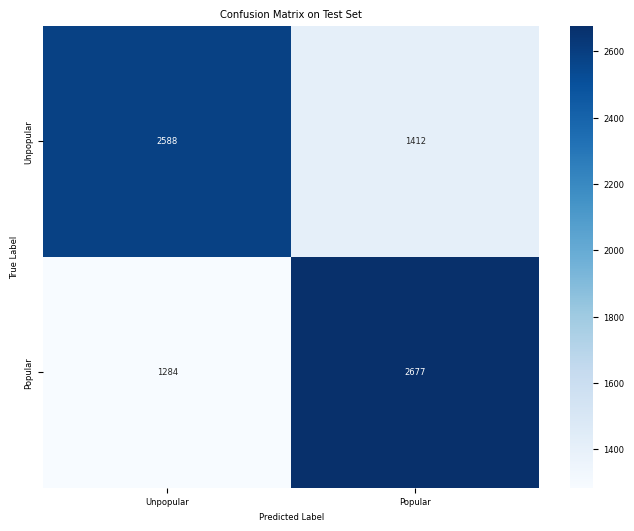

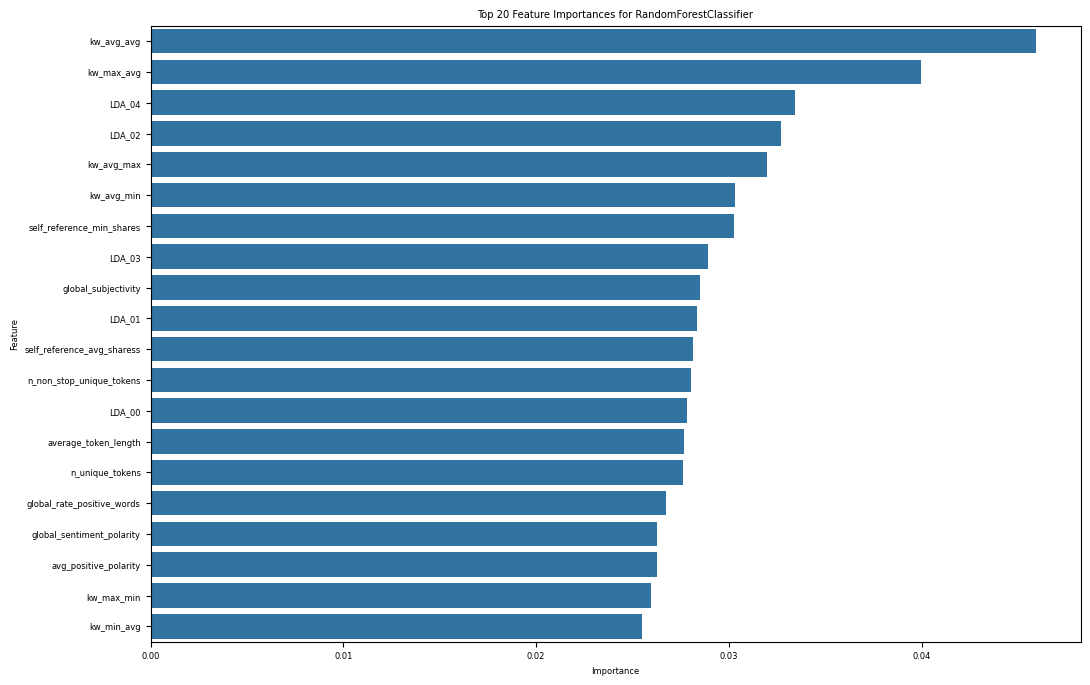

2025/10/11 17:09:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/11 17:10:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



✅ Modelo final registrado.


In [54]:
# --- Re-train the Best Model and Evaluate on the Hold-out Test Set ---
print("\n" + "="*50)
print("Evaluacion final del mejor modelo en el conjunto de prueba")

best_params = study.best_params.copy()
final_pipeline_steps = [
        ('scaler', StandardScaler())
]

classifier_name = best_params.pop('classifier')
# Rebuild the best classifier from the winning parameters
if classifier_name == 'RandomForest':
    model_params = {k.replace('rf_', ''): v for k, v in best_params.items()}
    final_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, **model_params)
elif classifier_name == 'MLP':
    best_params['hidden_layer_sizes'] = eval(best_params.pop('mlp_hidden_layers'))
    model_params = {k.replace('mlp_', ''): v for k, v in best_params.items()}
    final_classifier = MLPClassifier(max_iter=300, early_stopping=True, random_state=42, **model_params)
elif classifier_name == 'XGBoost':
    model_params = {k.replace('xgb_', ''): v for k, v in best_params.items()}
    final_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False,
                                         random_state=42, n_jobs=-1, **model_params)
elif classifier_name == 'LightGBM':
    model_params = {k.replace('lgbm_', ''): v for k, v in best_params.items()}
    final_classifier = lgb.LGBMClassifier(objective='binary', random_state=42, n_jobs=-1, **model_params)

final_pipeline_steps.append(('classifier', final_classifier))
final_pipeline = Pipeline(steps=final_pipeline_steps)

# --- Use same experiment as Optuna ---
mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("Online_News_Popularity_Estudio_Optuna")

# --- Retrieve the MLflow Run ID of the best trial (if available) ---
best_run_id = study.best_trial.system_attrs.get("mlflow_run_id")

with mlflow.start_run(
    run_name=f"Final_{classifier_name}_Model",
    nested=True,  # makes it appear as a sub-run
    tags={"stage": "final_evaluation"},
    parent_run_id=best_run_id  # link to best Optuna trial
):
    # --- Log parameters ---
    mlflow.log_param("classifier", classifier_name)
    mlflow.log_params(model_params)

    # Fit on the ENTIRE training set and evaluate on the hold-out test set
    final_pipeline.fit(X_train, y_train)
    y_pred_test = final_pipeline.predict(X_test)
    y_prob_test = final_pipeline.predict_proba(X_test)[:, 1] # Probabilities for the positive class

    # --- Final Metrics ---
    final_auc = roc_auc_score(y_test, y_prob_test)
    final_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"\nFinal Test AUC: {final_auc:.4f}")
    print(f"Final Test Accuracy: {final_accuracy:.4f}")
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred_test, target_names=['Unpopular', 'Popular']))
    
    # --- Log metrics ---
    mlflow.log_metric("final_auc", final_auc)
    mlflow.log_metric("final_accuracy", final_accuracy)


    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Unpopular', 'Popular'], yticklabels=['Unpopular', 'Popular'])
    plt.title('Confusion Matrix on Test Set')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    with tempfile.TemporaryDirectory() as tmpdir:
        cm_path = os.path.join(tmpdir, "confusion_matrix.png")
        plt.savefig(cm_path)
        mlflow.log_artifact(cm_path)
    plt.show()



    # --- Feature Importances (if available) ---
    if hasattr(final_classifier, 'feature_importances_'):
        importances = final_classifier.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
        plt.title(f'Top 20 Feature Importances for {final_classifier.__class__.__name__}')
        with tempfile.TemporaryDirectory() as tmpdir:
            imp_path = os.path.join(tmpdir, "feature_importance.png")
            plt.savefig(imp_path)
            mlflow.log_artifact(imp_path)
        plt.show()

    # --- Log the full pipeline model ---
    mlflow.sklearn.log_model(final_pipeline, artifact_path="final_model")

print("\n✅ Modelo final registrado.")

In [ ]:
#Correr esto en bash para ver los experimentos en la UI de mlflow
#mlflow ui --backend-store-uri file:\notebooks\mlruns
